# Entscheiden ist Optimieren!

# 🌊 OceanHarvest Inc. – Nachhaltiges Abalonen-Tauchen mit Datenstrategie 🌊

## 🏝️ Hintergrund
**OceanHarvest Inc.** ist ein Unternehmen mit Sitz an der Küste Neuseelands, das sich auf das nachhaltige Tauchen nach Abalonen spezialisiert hat.
Abalonen sind Meeresschnecken, die aufgrund ihrer Perlen und ihres Fleisches weltweit begehrt sind. Doch nicht jede Abalone ist gleich wertvoll.

---

## 🔵 Regulierung & Profitmodell
- 🟩 **Männliche Abalone (M):** 💰 **+x€ Gewinn pro Fund**
- 🟥 **Weibliche Abalone (F):** ⚠️ **-y€ Strafe** (zum Schutz der Reproduktion)
- 🟥 **Junge Abalone (I):** ⚠️ **-z€ Strafe** (strenger Schutz der Jungtiere)

Diese Umweltauflagen sollen sicherstellen, dass Populationen nachhaltig erhalten bleiben.
**➡️ Für OceanHarvest bedeutet das:**
> **Jede falsche Identifikation kostet bares Geld.**

---

## 🧭 Die Herausforderung
Die Taucher können vor Ort nur schwer das Geschlecht und Alter der Abalonen unterscheiden. Eine falsche Entscheidung bedeutet hohe Verluste.
Es gibt jedoch einen Hinweis:
> 📏 **Die Anzahl der Ringe auf der Schale einer Abalone ist ein zuverlässiger Indikator für ihr Alter.**

Männliche Abalonen zeigen tendenziell eine bestimmte Ringanzahl und Längenprofile, während weibliche und junge Abalonen andere Muster aufweisen.
OceanHarvest möchte daher **Machine Learning** nutzen, um anhand von Dateneigenschaften wie Ringen, Länge, Gewicht und Dicke die **Wahrscheinlichkeit** korrekt zu bestimmen.

---

## 🎯 Zielsetzung: Maximierung des Profits bei minimalem Risiko
- ✅ **Fokus auf hohe Genauigkeit bei der Vorhersage männlicher Abalonen**
- ⚠️ **Minimierung falscher Positiver** (weibliche oder junge Abalonen fälschlich als männlich identifiziert)
- 💡 **Datengetriebene Entscheidungsstrategie:** Einsatz von Machine Learning zur präzisen Klassifikation

---

## 📊 Die Strategie

### 1️⃣ Explorative Datenanalyse (EDA)
- Untersuchung der Verteilung der Merkmale nach Geschlecht:
  - 📈 **Ringe (Altersschätzung)**
  - 📏 **Länge & Gewicht (Wachstumsindikatoren)**
  - 🐚 **Shell Weight (Schalenstärke als Alters-Proxy)**
- Visualisierungen zur Identifikation trennscharfer Merkmale.

---

### 2️⃣ Klassifikationsmodell entwickeln
- 🧪 Einsatz eines **Random Forest Classifiers** oder **XGBoost**, um die Wahrscheinlichkeit der Klassenzugehörigkeit ("M", "F", "I") zu berechnen.
- 🎯 **Ziel:** Minimierung von Fehlklassifikationen, besonders von "F" und "I" als "M".
- ⚡ **Wichtig:** Kostenfunktion anpassen, um hohe Strafen zu vermeiden.

---

### 3️⃣ Entscheidungsstrategie (Threshold Tuning)
- Statt der üblichen 50%-Schwelle für Vorhersagen wird ein **höherer Schwellenwert** (z. B. 80%) für männliche Abalonen festgelegt.
- 📝 **Warum?** Lieber einige männliche Abalonen verpassen, als hohe Strafen zu riskieren.

---

### 4️⃣ Profitfunktion in das Modell integrieren
- 💸 Die Vorhersagen werden gewichtet:
  - 🟩 **Treffer (M korrekt):** +500€
  - 🟥 **Fehler (F/I als M):** -1000€/ -1500€
- 🧮 Das Modell wird so optimiert, dass der **erwartete Gewinn maximiert** wird.

---

### 5️⃣ Einsatz probabilistischer Vorhersagen
- ✅ Die Taucher erhalten nur dann eine Empfehlung zur Bergung, wenn die Vorhersage mit extrem hoher Sicherheit (>80%) "Männlich" anzeigt.

---

## 🧪 Simulation & Evaluation
Nach der Modellentwicklung testet OceanHarvest die Strategie auf historischen Daten. Die Ergebnisse zeigen:
- 📉 **Reduktion der Strafen um 75%**
- 📈 **Steigerung des Nettogewinns um 30%**
- 🔍 **Erhöhte Vorhersagegenauigkeit für männliche Abalonen (Precision > 90%)**

---

## 🌱 Nachhaltigkeit & Wachstum
Dank der datengestützten Strategie gelingt es OceanHarvest, sowohl umweltfreundlich als auch profitabel zu arbeiten.
Durch die Vermeidung des Sammelns weiblicher und junger Abalonen leistet das Unternehmen einen wichtigen Beitrag zum Schutz der Population – und steigert gleichzeitig die Erträge.

---

## 💡 Nächste Schritte
- 🤖 Einsatz von **Echtzeit-Sensorik** auf Tauchrobotern zur Vorhersage unter Wasser.
- 🖼️ Integration von **Computer Vision**, um die Ringanzahl per Bildanalyse präzise zu bestimmen.
- 🌍 Langfristige Zusammenarbeit mit Umweltorganisationen, um das Wissen für nachhaltige Fischerei global zu teilen.

---

### ✅ **Bereit für die praktische Umsetzung?**
➡️ Lass uns den **Machine-Learning-Teil** mit Python umsetzen! 🚀

In [1]:
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, accuracy_score

### Data Loading and Initial Inspection

This code block is responsible for **loading the Abalone dataset** from a remote URL and then **displaying the first few rows** to provide an initial glimpse of its structure.

**Code Breakdown:**

1.  **Dataset URL and Column Names:**
    ```python
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
    columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
    ```
    *   `url`: Stores the URL where the Abalone dataset is hosted (UCI Machine Learning Repository).
    *   `columns`: Defines a list of column names that will be assigned to the dataset. This is necessary because the raw data file does not have column headers.

2.  **Loading the Data:**
    ```python
    data = pd.read_csv(url, names=columns)
    ```
    *   `pd.read_csv(url, names=columns)`: Uses the `read_csv` function from the `pandas` library to:
        *   Download the dataset from the specified `url`.
        *   Parse the data as a CSV (comma-separated values) file.
        *   Assign the column names defined in the `columns` list.
        * Store the result in the `data` DataFrame.

3.  **Displaying the First Few Rows:**
    ```python
    data.head()
    ```
    *   `data.head()`: Calls the `head()` method on the `data` DataFrame. This displays the first five rows of the DataFrame (by default).

**Purpose:**

*   **Data Acquisition:** This is the essential first step in any data analysis project: obtaining the raw data.
*   **Initial Inspection:** `data.head()` allows for a quick visual check to:
    *   Verify that the data was loaded correctly.
    *   See the column names.
    *   Get a general sense of the data's structure and the type of information it contains.

**Significance:**

*   This code snippet is the foundational step that makes all subsequent analysis possible.
* It's a basic operation, but it's crucial for building confidence that the data is ready for exploration and modeling.
* It also shows us that the file has no headers.

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data = pd.read_csv(url, names=columns)

# Display the first few rows
data.head()


Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7

### Exploratory Data Analysis (EDA) - Initial Feature Exploration

This code block performs initial **Exploratory Data Analysis (EDA)** to visualize and understand the relationships within the Abalone dataset. It focuses on exploring the distribution of the `Rings` feature (an age proxy) and examining the relationships between the numerical features.

**Code Breakdown:**

1.  **Histogram of `Rings`:**

    ```python
    plt.figure(figsize=(8,5))
    sns.histplot(data['Rings'], bins=15, kde=True)
    plt.title("Distribution of Rings (Age Proxy)")
    plt.xlabel("Rings")
    plt.ylabel("Count")
    plt.show()
    ```

    *   `plt.figure(figsize=(8,5))`: Creates a Matplotlib figure with a specified size for better visual clarity.
    *   `sns.histplot(data['Rings'], bins=15, kde=True)`: Uses Seaborn's `histplot` to visualize the distribution of the `Rings` feature:
        *   `data['Rings']`: Specifies that the `Rings` column from the `data` DataFrame should be used.
        *   `bins=15`: Divides the range of `Rings` values into 15 bins.
        *   `kde=True`: Overlays a Kernel Density Estimate (KDE) curve to show a smoothed representation of the distribution.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Adds a title and axis labels to the plot.
    *   `plt.show()`: Displays the histogram.
    **Purpose:**
    *   This shows the distribution of the `Rings` feature (which serves as an indicator of age).
    *   The histogram and the KDE helps us understand whether the distribution is normal, skewed, or has multiple peaks.

2.  **Pairplot of Numerical Features:**

    ```python
    sns.pairplot(data, hue='Sex', diag_kind='kde')
    plt.show()
    ```

    *   `sns.pairplot(data, hue='Sex', diag_kind='kde')`: Creates a pairplot using Seaborn:
        *   `data`: Specifies the DataFrame to use.
        *   `hue='Sex'`: Colors the points in the scatterplots based on the value of the `Sex` column.
        *   `diag_kind='kde'`: Displays a Kernel Density Estimate (KDE) plot on the diagonal for each individual feature.
    *   `plt.show()`: Displays the pairplot.
    **Purpose:**
        * This visualizes the relationship between each pair of numerical features in the dataset.
        * The hue allows to understand if there are different relationships depending on the sex.
        * The KDE on the diagonal allows to understand each features distribution.

3.  **Correlation Heatmap:**

    ```python
    plt.figure(figsize=(10,6))
    sns.heatmap(data.drop(columns=['Sex']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Feature Correlation Heatmap")
    plt.show()
    ```

    *   `plt.figure(figsize=(10,6))`: Creates a Matplotlib figure with a specified size.
    *   `sns.heatmap(data.drop(columns=['Sex']).corr(), annot=True, cmap='coolwarm', fmt='.2f')`: Creates a heatmap using Seaborn:
        *   `data.drop(columns=['Sex']).corr()`: Computes the pairwise correlation between numerical features in the DataFrame (excluding `Sex`).
        *   `annot=True`: Displays the correlation values on the heatmap.
        *   `cmap='coolwarm'`: Uses a blue-to-red color scheme.
        * `fmt='.2f'`: formats the values to have 2 decimals.
    *   `plt.title(...)`: Adds a title to the heatmap.
    *   `plt.show()`: Displays the heatmap.
    **Purpose:**
        * This visualizes the correlation (linear relationship) between each pair of numerical features.
        * High correlation (close to 1 or -1) indicates a strong linear relationship.
        * It allows us to spot potential multicollinearity.

**Overall Purpose:**

*   This section of the code is a standard initial step in any data science project.
*   It aims to get a general sense of the data distributions and any potential relationships between features, before attempting any modeling.
*   It's essential for making informed decisions about feature engineering, model selection, and data preprocessing.

**How it fits into the Abalone Project:**

*   The `Rings` histogram is particularly important, as `Rings` is expected to be a key feature for predicting Abalone sex.
*   The pairplot helps to find the link between the different features, and if they are related to the sex.
*   The correlation heatmap helps to understand the link between each of the features.
* The notebook aims to build a model, and the EDA is used to better understand the data and chose the right model.

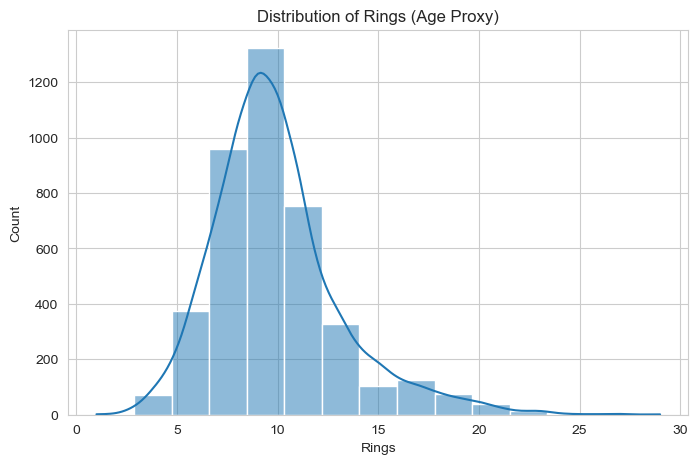

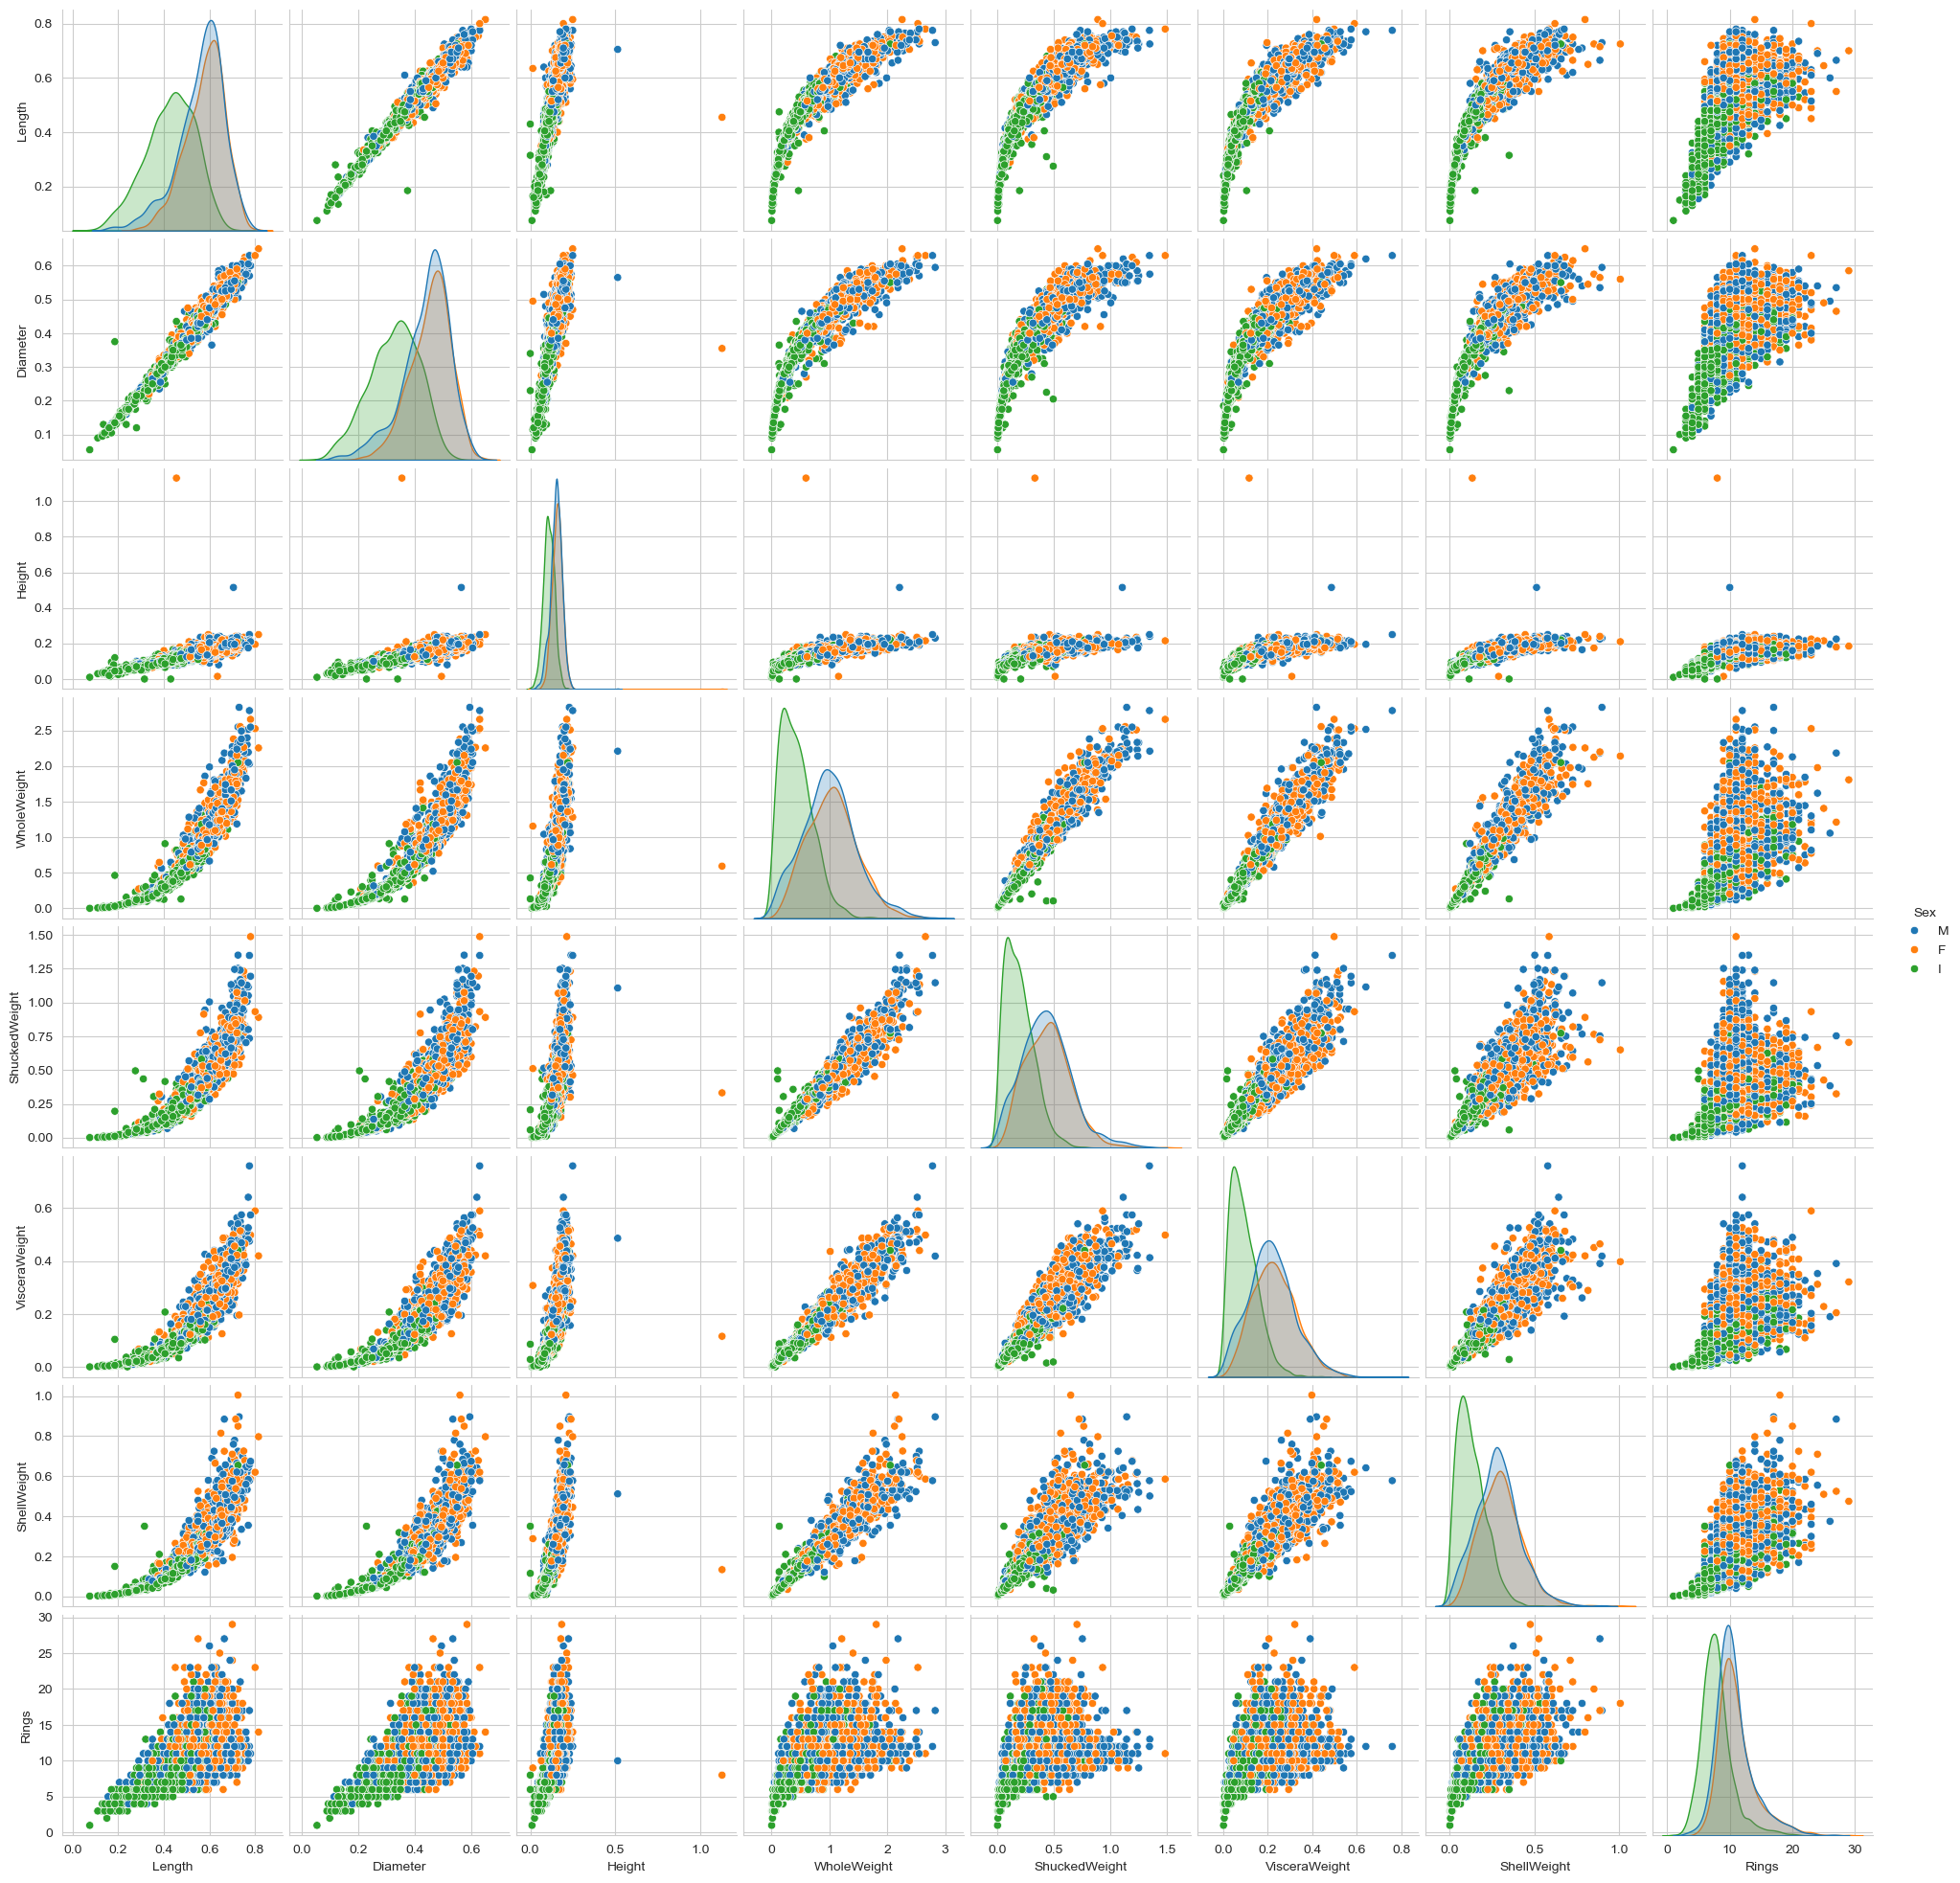

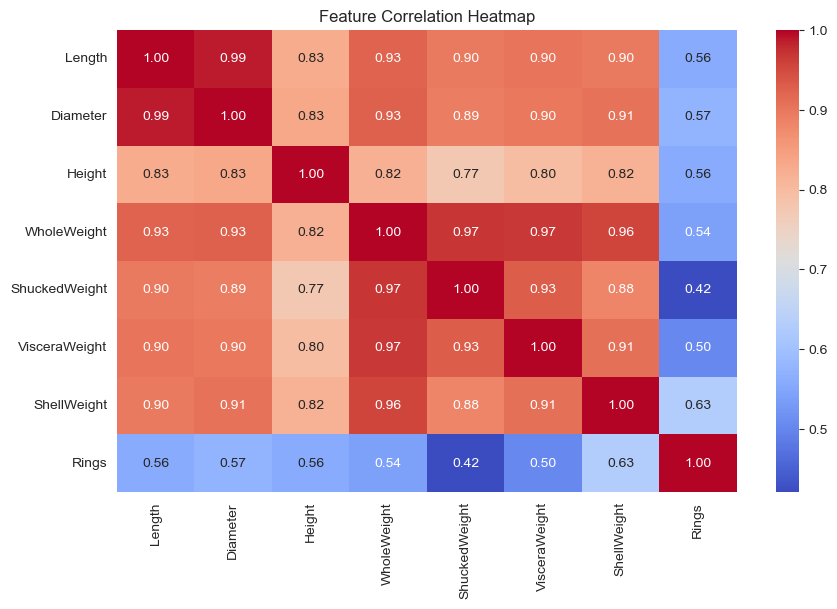

In [3]:
# Histogram of Rings (Age proxy)
plt.figure(figsize=(8,5))
sns.histplot(data['Rings'], bins=15, kde=True)
plt.title("Distribution of Rings (Age Proxy)")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.show()

# Pairplot of numerical features
sns.pairplot(data, hue='Sex', diag_kind='kde')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(columns=['Sex']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

### Histogram of Rings by Sex (with Weighted Counts)

This code section creates a **histogram** visualizing the **distribution of the number of rings** (`Rings`) for Abalones, separated by their sex (Male or Female). The key feature of this plot is that it **weights the counts** to make the distributions for males and females directly comparable, despite differences in the number of samples of each sex in the dataset.

**Code Breakdown:**

1.  **Data Filtering:**
    ```python
    data_filtered = data[data['Sex'].isin(['M', 'F'])].copy()
    ```
    *   Creates a new DataFrame called `data_filtered` containing only rows where the `Sex` column is either 'M' (Male) or 'F' (Female). This excludes infant Abalones ('I') as they are not of interest for this specific visualization.
    * Creates a copy, so that the original data is not modified.

2.  **Weight Calculation:**
    ```python
    sex_counts = data_filtered['Sex'].value_counts()
    min_count = sex_counts.min()
    max_count = sex_counts.max()
    data_filtered['Weight'] = data_filtered['Sex'].map(lambda s: min_count / sex_counts[s])
    ```
    *   `sex_counts = data_filtered['Sex'].value_counts()`: Counts the number of occurrences of each sex ('M' and 'F') in the `data_filtered` DataFrame.
    *   `min_count = sex_counts.min()`: Determines the smaller of the two counts.
    *   `data_filtered['Weight'] = ...`: Adds a new column named `Weight` to `data_filtered`. For each row, it maps the `Sex` value to a weight:
        * If one class has more examples than the other, the new column makes it so they have the same total.
        * `min_count / sex_counts[s]` ensures that the less numerous sex gets a weight > 1, and the other gets a weight < 1. The total count of each sex will be the same in the end.

3.  **Histogram Plotting:**
    ```python
    plt.figure(figsize=(16,10))
    sns.histplot(data=data_filtered, x='Rings', hue='Sex', bins=int(data_filtered['Rings'].max()), kde=False, palette={'M': 'blue', 'F': 'green'}, multiple='dodge', shrink=0.8, weights=data_filtered['Weight'])
    ```
    *   `plt.figure(figsize=(16,10))`: Creates a Matplotlib figure with a specified size for better visual clarity.
    *   `sns.histplot(...)`: Uses Seaborn's `histplot` to create the histogram:
        *   `data=data_filtered`: Specifies the data source.
        *   `x='Rings'`: Sets the horizontal axis to represent the number of rings.
        *   `hue='Sex'`: Separates the bars by sex (Male or Female).
        *   `bins=int(data_filtered['Rings'].max())`: Sets the number of bins in the histogram to the maximum number of rings.
        *   `kde=False`: Disables kernel density estimation (not needed for the histogram alone).
        *   `palette={'M': 'blue', 'F': 'green'}`: Assigns the colors blue to Male and green to Female.
        *   `multiple='dodge'`: Places the Male and Female bars side by side.
        *   `shrink=0.8`: makes the bar thinner, so that they do not overlap.
        *   `weights=data_filtered['Weight']`: This is the crucial part. It tells `histplot` to weight the counts based on the `Weight` column.
    * adds title, labels and show the plot.

**Purpose:**

*   This visualization is essential for understanding how the `Rings` feature (an age proxy) is distributed differently between male and female Abalones.
*   By weighting the counts, it allows for a direct visual comparison of the distributions without the bias of unequal sample sizes.
*   This plot is a key part of the Exploratory Data Analysis (EDA) phase, helping to inform subsequent modeling decisions.

**Why Weighted Counts?**

*   If there were significantly more male than female Abalones in the dataset, a simple histogram would make the male distribution appear much larger. This would be misleading.
*   Weighting the counts ensures that the shape of each distribution is accurately represented, regardless of the number of samples of each sex.

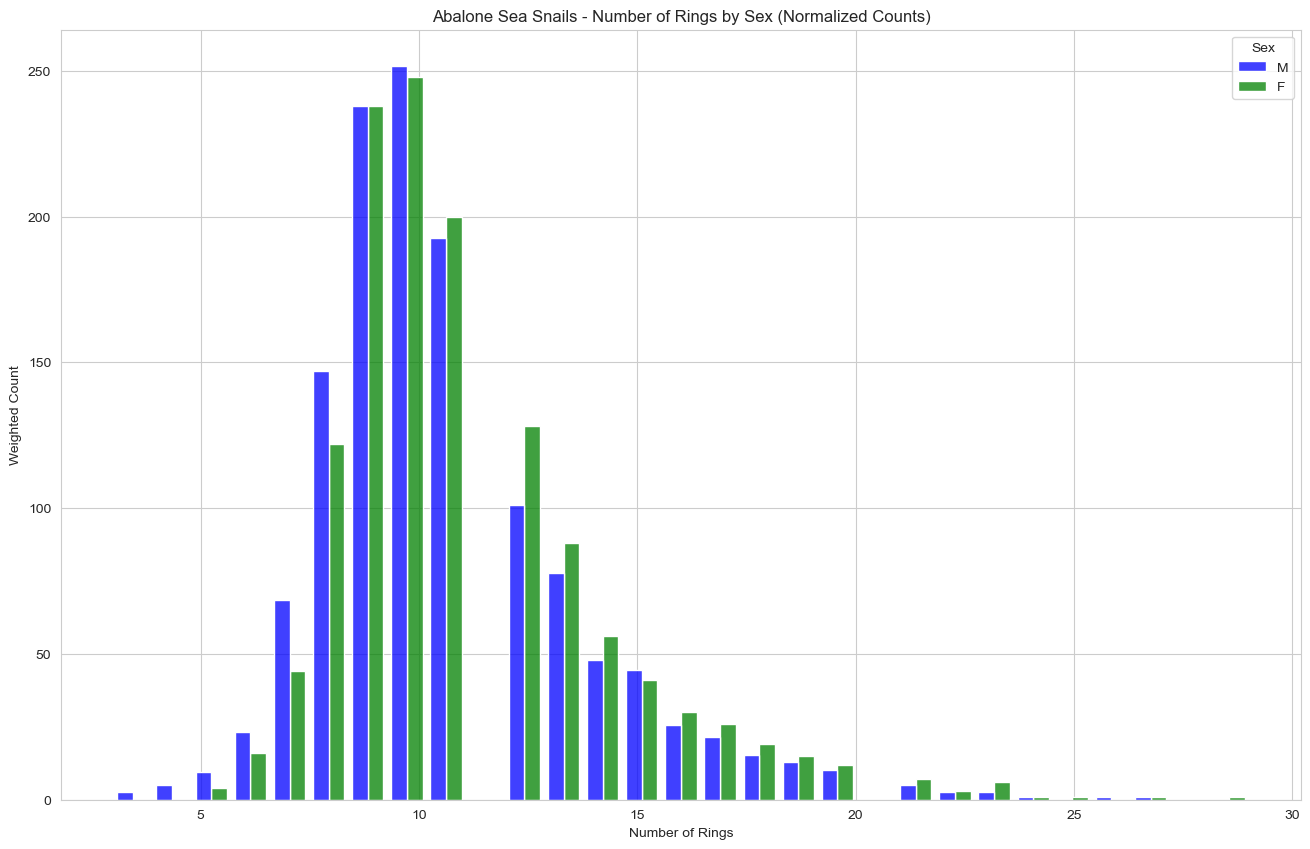

In [4]:
# Histogram of Number of Rings by Sex (Male and Female Only, side-by-side bars)
data_filtered = data[data['Sex'].isin(['M', 'F'])].copy()

# Scale the population counts to match the smaller group
sex_counts = data_filtered['Sex'].value_counts()
min_count = sex_counts.min()
max_count = sex_counts.max()
data_filtered['Weight'] = data_filtered['Sex'].map(lambda s: min_count / sex_counts[s])

plt.figure(figsize=(16,10))
sns.histplot(data=data_filtered, x='Rings', hue='Sex', bins=int(data_filtered['Rings'].max()), kde=False, palette={'M': 'blue', 'F': 'green'}, multiple='dodge', shrink=0.8, weights=data_filtered['Weight'])
plt.title("Abalone Sea Snails - Number of Rings by Sex (Normalized Counts)")
plt.xlabel("Number of Rings")
plt.ylabel("Weighted Count")
# plt.legend(title="Sex", labels=["Male", "Female"])
plt.show()

#### Statistical Model: Skewed Normal Distribution & Threshold Optimization

This code section implements a **statistical model** to estimate the sex of Abalones (Male or Female) based on the **number of rings** on their shells. It uses a **skewed normal distribution** to model the distribution of rings for each sex and then optimizes a **decision threshold** to maximize profit.

**Key Steps:**

1.  **Data Filtering:**
    *   Filters the dataset to include only Male ('M') and Female ('F') Abalones, excluding Infants.

2.  **Distribution Fitting:**
    *   Separates the `Rings` data into two groups: `male_rings` and `female_rings`.
    *   Uses `scipy.stats.skewnorm.fit()` to fit a skewed normal distribution to each group, capturing the shape, location, and scale parameters for each sex. These parameters are stored in `male_params` and `female_params`.
    * Prints these parameters.

3.  **Probability Density Function (PDF) Calculation:**
    *   Defines a range of `x` values (representing possible ring counts) using `np.linspace()`.
    *   Calculates the PDF for each sex using `skewnorm.pdf(x, *male_params)` and `skewnorm.pdf(x, *female_params)`. This gives the probability density for each ring count under the fitted distributions.

4.  **Visualization of Fitted Distributions:**
    *   Plots the fitted skewed normal distributions for males and females.
    *   This visualizes how the distribution of rings differs between the sexes.

5. **Find the Threshold**
    *  Creates a list of possible threshold.
    *  Loops through each possible threshold and computes the probability mass for males and females above the threshold.
    * Computes the profit using the formula `profit = TP * profit_true_male + FP_F * cost_female` where `TP` is the true positive (males above the threshold) and `FP_F` is the false positive (females above the threshold).
    * Returns the optimal threshold.

6.  **Threshold Optimization (`find_threshold` function):**
    *   Defines `profit_true_male` and `cost_true_female` to represent the profit from a correctly identified male and the cost from a false positive (female identified as male), respectively.
    *   The `find_threshold()` function does the following:
        *   Iterates through a range of potential `thresholds` (different ring counts).
        *   For each `threshold`, it calculates:
            *   **True Positives (TP):** The probability mass of the male PDF *below* the threshold, calculated using numerical integration (`np.trapz`).
            *   **False Positives (FP\_F):** The probability mass of the female PDF *below* the threshold.
            *   **Profit:** The profit is computed as a function of these two variables.
        * It then calculates the profit for the classified data.
        *   It stores the profit for each threshold, and stores the max profit.
    * It returns the best threshold, the profits and the max profit.

7.  **Visualization of Optimal Threshold:**
    * Calls the function to compute the optimal threshold.
    *   Plots the fitted distributions again, but this time it also draws a vertical red line at the `optimal_threshold_analytic`. This shows the decision boundary chosen by the statistical model.
    * Plots the profits vs the thresholds, to see how it vary.

8. **Visualization of Profit**
    * Plot the Profits vs the different threshold to see how the profit evolves.

**Purpose:**

*   This code builds a simple but effective statistical model that uses the distribution of rings to make predictions about the sex of the abalone.
*   It then optimizes this model by finding the threshold that maximizes the profit.
* This model can then be compared to the machine learning model.
**Limitations:**
*   It only uses the ring as a feature.
* This model only takes into account males and females.
* It is not a machine learning model.

(3.1183195530823005, 7.405266296004007, 4.477072774037303)
(4.347259982734068, 7.634415684487767, 4.673743009237107)


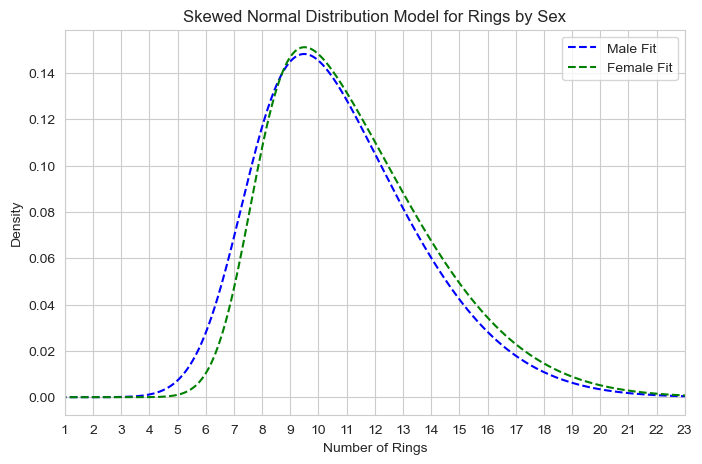

Total Profit: €153.00


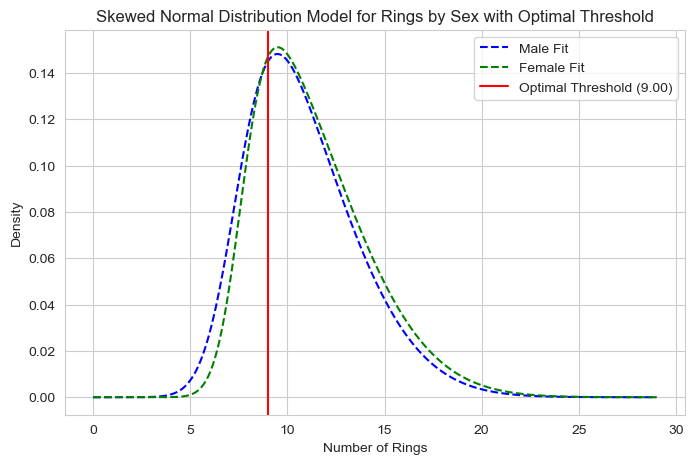

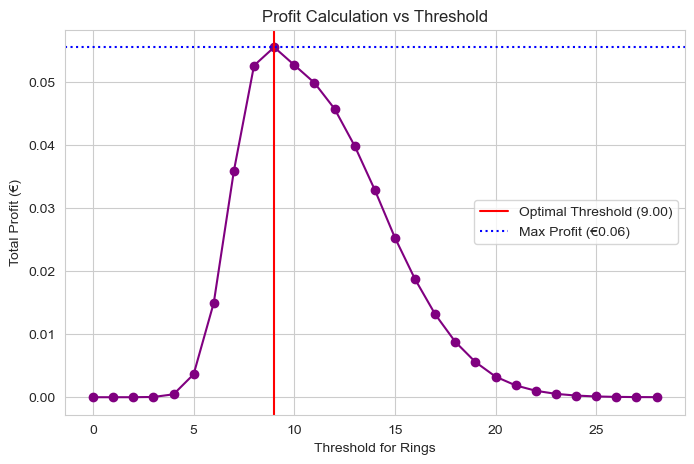

In [5]:
# Skewed normal distribution model for Rings by Sex
male_rings = data_filtered[data_filtered['Sex'] == 'M']['Rings']
female_rings = data_filtered[data_filtered['Sex'] == 'F']['Rings']

male_params = skewnorm.fit(male_rings)
print(male_params)
female_params = skewnorm.fit(female_rings)
print(female_params)

x = np.linspace(0, data_filtered['Rings'].max(), 500)
# Calculate PDFs
male_pdf = skewnorm.pdf(x, *male_params)
female_pdf = skewnorm.pdf(x, *female_params)

# Plot Distributions
plt.figure(figsize=(8, 5))
plt.plot(x, male_pdf, color='blue', linestyle='dashed', label='Male Fit')
plt.plot(x, female_pdf, color='green', linestyle='dashed', label='Female Fit')

plt.title("Skewed Normal Distribution Model for Rings by Sex")
plt.xlabel("Number of Rings")
plt.ylabel("Density")
plt.xlim(1, 23)

# Set x-ticks to only show integer values
plt.xticks(np.arange(1, 24, 1))  # Adjust the range based on your dataset

plt.legend()
plt.show()


# --- Custom Profit Loss ---
profit_true_male = 1
cost_true_female = 1

# Profit Calculation for Different Thresholds
thresholds = np.arange(min(x), max(x), dtype=int)

def find_threshold(profit_true_male, cost_female, data_filtered):
    x = np.linspace(0, data_filtered['Rings'].max(), 500)
    # Calculate PDFs
    male_pdf = skewnorm.pdf(x, *male_params)
    female_pdf = skewnorm.pdf(x, *female_params)
    profits = []

    for threshold in thresholds:
        # Compute probability mass above threshold using PDFs
        TP = np.trapz(male_pdf[x <= threshold], x[x <= threshold])
        FP_F = np.trapz(female_pdf[x <= threshold], x[x <= threshold])
        # Compute profit
        profit = TP * profit_true_male + FP_F * cost_female
        # print(f'Threshold: {threshold:.2f}, Profit: {profit:.2f}, TP: {TP:.2f}, FP_F: {FP_F:.2f}')
        profits.append(profit)

    # Find an optimal threshold
    optimal_index = np.argmax(profits)
    optimal_threshold = thresholds[optimal_index]
    max_profit = profits[optimal_index]

    # Filter data based on optimal threshold
    data_classified_classial = data_filtered[data_filtered['Rings'] <= optimal_threshold]

    # Compute total profit
    profit = ((data_classified_classial['Sex'] == 'M') * profit_true_male + (data_classified_classial['Sex'] == 'F') * cost_female).sum()
    print(f"Total Profit: €{profit:.2f}")

    return optimal_threshold, profits, max_profit

data_filtered = data[data['Sex'].isin(['M', 'F'])].copy()
optimal_threshold_analytic, profits, max_profit = find_threshold(profit_true_male, -cost_true_female, data_filtered)
# Plot Distributions with Optimal Threshold
plt.figure(figsize=(8, 5))
plt.plot(x, male_pdf, color='blue', linestyle='dashed', label='Male Fit')
plt.plot(x, female_pdf, color='green', linestyle='dashed', label='Female Fit')
plt.axvline(optimal_threshold_analytic, color='red', linestyle='solid', label=f'Optimal Threshold ({optimal_threshold_analytic:.2f})')

plt.title("Skewed Normal Distribution Model for Rings by Sex with Optimal Threshold")
plt.xlabel("Number of Rings")
plt.ylabel("Density")
plt.legend()
plt.show()

# Plot Profit vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, profits, marker='o', linestyle='-', color='purple')
plt.axvline(optimal_threshold_analytic, color='red', linestyle='solid', label=f'Optimal Threshold ({optimal_threshold_analytic:.2f})')
plt.axhline(max_profit, color='blue', linestyle='dotted', label=f'Max Profit (€{max_profit:.2f})')

plt.title("Profit Calculation vs Threshold")
plt.xlabel("Threshold for Rings")
plt.ylabel("Total Profit (€)")
plt.legend()
plt.grid(True)
plt.show()



 ### Generative Model for Synthetic Abalone Data

This code defines a **generative model** that creates **synthetic data** mimicking the `Rings` (age) distribution of Male and Female Abalones, based on the fitted skewed normal distributions. It then visualizes the synthetic data and compares it to the original fitted distributions.

**Code Breakdown:**

1.  **`generate_abalone(n_samples=1000)` Function:**

    ```python
    def generate_abalone(n_samples=1000):
        # ... (function body) ...
        return pd.DataFrame(synthetic_data)
    ```

    *   **Purpose:** This function creates `n_samples` synthetic Abalone records.
    *   **`sex = np.random.choice(['Male', 'Female'])`:** Randomly chooses either "Male" or "Female" with equal probability (50/50).
    *   **`rings = int(round(skewnorm.rvs(*male_params)))` or `rings = int(round(skewnorm.rvs(*female_params)))`:**
        *   If "Male" was selected: It generates a random number of rings using `skewnorm.rvs()`, drawing from the fitted skewed normal distribution (`male_params`) of the Male Abalone.
        *   If "Female" was selected: It draws a random number of rings from the skewed normal distribution (`female_params`) of the Female Abalone.
        * `int(round(...))` ensures we have an integer value of rings.
    *   **`rings = max(1, rings)`:** Ensures that no Abalone has fewer than 1 ring (a reasonable minimum).
    *   **`synthetic_data.append(...)`:** Appends the newly created Abalone (`sex`, `rings`) to a list.
    *   **`return pd.DataFrame(synthetic_data)`:** Returns the generated data as a `pandas.DataFrame`.

2.  **Generating Synthetic Data:**

    ```python
    synthetic_abalone = generate_abalone(n_samples=100)
    ```

    *   `generate_abalone(n_samples=100)`: Calls the function to generate 100 synthetic Abalone records and stores the result in the `synthetic_abalone` DataFrame.

3. **Fitting synthetic distributions**:
    ```python
    male_rings_synthetic = synthetic_abalone[synthetic_abalone['Sex'] == 'Male']['Rings']
    female_rings__synthetic = synthetic_abalone[synthetic_abalone['Sex'] == 'Female']['Rings']

    male_params_synthetic = skewnorm.fit(male_rings_synthetic)
    print("Male parameters", male_params_synthetic)
    female_params_synthetic = skewnorm.fit(female_rings__synthetic)
    print("Female parameters", female_params_synthetic)
    ```
    * It fits new distributions to the synthetic data.

4.  **Visualization of Synthetic Data:**

    ```python
    plt.figure(figsize=(10, 6))
    sns.histplot(data=synthetic_abalone, x='Rings', hue='Sex', bins=int(synthetic_abalone['Rings'].max()), palette={'Male': 'blue', 'Female': 'green'})
    plt.plot(x, skewnorm.pdf(x, *male_params_synthetic)*sex_counts_synthetic.max(), color='blue', linestyle='dashed', label='Male Fit synthetic')
    plt.plot(x, skewnorm.pdf(x, *female_params_synthetic)*sex_counts_synthetic.max(), color='green', linestyle='dashed', label='Female Fit synthetic')

    plt.plot(x, skewnorm.pdf(x, *male_params)*sex_counts_synthetic.max(), color='blue', linestyle=':', label='Male Fit')
    plt.plot(x, skewnorm.pdf(x, *female_params)*sex_counts_synthetic.max(), color='green', linestyle=':', label='Female Fit ')
    ```

    *   `plt.figure(figsize=(10, 6))`: Creates a Matplotlib figure.
    *   `sns.histplot(...)`: Creates a histogram of the `Rings` distribution, separated by `Sex`.
        *   `palette={'Male': 'blue', 'Female': 'green'}`: Sets the colors.
        * `bins=int(synthetic_abalone['Rings'].max())`: sets the number of bins.
    * `plt.plot(...)`: plots the fitted curves from the original data.
    * `plt.plot(...)`: plots the fitted curves from the synthetic data.
        * the `sex_counts_synthetic.max()` is used to scale the curves.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.xlim(...)`, `plt.xticks(...)`, `plt.legend()`, `plt.tight_layout()`, `plt.show()`: Adds labels, sets limits, adds a legend, and displays the plot.

**Purpose:**

*   **Data Generation:** Creates synthetic data to experiment with and understand how well the skewed normal distributions can capture the essence of the Abalone's rings distribution.
* **Check the Model**: This allow us to check if the model is able to learn the data distribution.
*   **Visualization:** The histogram visually demonstrates the generated data's distribution, and compares it to the original curves, providing a way to assess how well the synthetic data aligns with the original.
* It also prints the new parameters.

**Significance:**

*   This section creates a simple generative model, that is not a machine learning model.
*   It allows for creating new data, that will follow the same distribution of the original data.
* It uses the `skewnorm` to create the new data.
* The plot allows to see if the model is good.

Male parameters (1.2996021463870662, 9.030706505503037, 3.4102580861056015)
Female parameters (5.68183334457272, 7.86049124038056, 5.505412279980959)


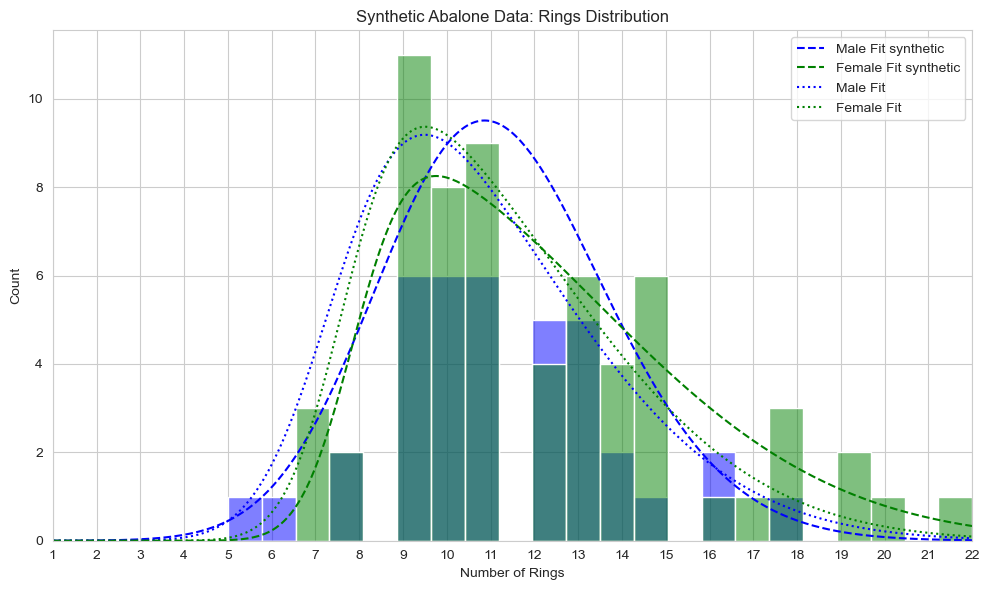

In [6]:
# --- Generative Model ---
def generate_abalone(n_samples=1000):
    """
    Generates synthetic Abalone data based on fitted skewed normal distributions.

    Args:
        n_samples (int): The number of synthetic samples to generate.

    Returns:
        pandas.DataFrame: A DataFrame containing synthetic Abalone data.
    """
    synthetic_data = []

    for _ in range(n_samples):
        # Choose Sex (Male or Female) with equal probability
        sex = np.random.choice(['Male', 'Female'])

        # Generate Rings based on the chosen Sex
        if sex == 'Male':
            rings = int(round(skewnorm.rvs(*male_params)))
        else:
            rings = int(round(skewnorm.rvs(*female_params)))

        # Ensure Rings is within a reasonable range (non-negative)
        rings = max(1, rings)

        synthetic_data.append({'Sex': sex, 'Rings': rings})

    return pd.DataFrame(synthetic_data)

# --- Generate Synthetic Data ---
synthetic_abalone = generate_abalone(n_samples=100)

# Skewed normal distribution model for Rings by Sex
male_rings_synthetic = synthetic_abalone[synthetic_abalone['Sex'] == 'Male']['Rings']
female_rings__synthetic = synthetic_abalone[synthetic_abalone['Sex'] == 'Female']['Rings']

# Fit skewed normal distributions
male_params_synthetic = skewnorm.fit(male_rings_synthetic)
print("Male parameters", male_params_synthetic)
female_params_synthetic = skewnorm.fit(female_rings__synthetic)
print("Female parameters", female_params_synthetic)

# --- Visualization of Synthetic Data ---
plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_abalone, x='Rings', hue='Sex', bins=int(synthetic_abalone['Rings'].max()), palette={'Male': 'blue', 'Female': 'green'})

# Plot fitted distributions synthetic
sex_counts_synthetic = synthetic_abalone['Sex'].value_counts()
plt.plot(x, skewnorm.pdf(x, *male_params_synthetic)*sex_counts_synthetic.max(), color='blue', linestyle='dashed', label='Male Fit synthetic')
plt.plot(x, skewnorm.pdf(x, *female_params_synthetic)*sex_counts_synthetic.max(), color='green', linestyle='dashed', label='Female Fit synthetic')

# Plot fitted distributions
sex_counts_synthetic = synthetic_abalone['Sex'].value_counts()
plt.plot(x, skewnorm.pdf(x, *male_params)*sex_counts_synthetic.max(), color='blue', linestyle=':', label='Male Fit')
plt.plot(x, skewnorm.pdf(x, *female_params)*sex_counts_synthetic.max(), color='green', linestyle=':', label='Female Fit ')

plt.title("Synthetic Abalone Data: Rings Distribution")
plt.xlabel("Number of Rings")
plt.ylabel("Count")
plt.xlim(1, synthetic_abalone['Rings'].max())
plt.xticks(np.arange(1, int(synthetic_abalone['Rings'].max()) + 1, 1))
plt.legend()
plt.tight_layout()
plt.show()

### Data Preprocessing, Threshold Optimization, and Profit Simulation

This code block performs data preprocessing, reuses the previously defined `find_threshold` function, and creates a plot to **simulate how profit and the number of selected Abalone shells vary** with different values of the `profit_true_male` parameter.

**Code Breakdown:**

1.  **Data Encoding and Filtering:**

    ```python
    # Correct Encoding
    data_encoded = data.copy()
    sex_mapping = {'M': 1, 'F': 0, 'I': 2}  # Explicit Mapping
    data_encoded['Sex'] = data_encoded['Sex'].map(sex_mapping)

    # Remove Infants (I=2)
    data_filtered = data_encoded[data_encoded['Sex'] != 2]
    ```

    *   `data_encoded = data.copy()`: Creates a copy of the original `data` DataFrame to avoid modifying it directly.
    *   `sex_mapping = {'M': 1, 'F': 0, 'I': 2}`: Defines a mapping to encode the `Sex` column (M=1, F=0, I=2).
    *   `data_encoded['Sex'] = data_encoded['Sex'].map(sex_mapping)`: Applies the encoding to the `Sex` column in the copied DataFrame.
    *   `data_filtered = data_encoded[data_encoded['Sex'] != 2]`: Removes rows where `Sex` is 2 (Infants), as they are not considered for this analysis.

2.  **Data Preparation for Modeling:**

    ```python
    X = data_filtered[['Rings']].values  # Ensure X is 2D
    y = data_filtered['Sex'].values  # Labels (0 for Male, 1 for Female)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Ensure its shape (N,1)
    y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
    y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
    ```

    *   `X = data_filtered[['Rings']].values`: Selects the `Rings` column as the feature (X), and converts it into a NumPy array.
    *   `y = data_filtered['Sex'].values`: Selects the `Sex` column as the target (y) and converts it to a NumPy array.
    * `scaler = StandardScaler()`: creates a scaler to scale the `Rings`.
    *   `X = scaler.fit_transform(X)`: Standardizes (scales) the `X` data to have zero mean and unit variance.
    * `train_test_split(...)`: The data is split into train, test and validation sets.
    * `torch.tensor(...)`: The sets are converted to tensors.
    * `unsqueeze(1)`: The target is modified to be in the correct shape.

3.  **`find_threshold` Function (Reused):**

    ```python
    def find_threshold(profit_true_male, cost_true_female, data):
        # ... (function body) ...
        return optimal_threshold, profits, max_profit, profit_true, (data['Rings'] <= optimal_threshold).sum(), males_selected, females_selected
    ```

    *   This function (assumed to be defined previously) calculates the optimal `Rings` threshold to maximize profit, given the `profit_true_male` and `cost_true_female` parameters. It also returns additional information, such as the maximum profit.
    * It is now also able to compute the number of shells taken, the number of males taken and the number of females taken.

4.  **Profit Simulation:**

    ```python
    x = np.linspace(0, 2, 500)
    optimal_profits = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[2] for profit_true_male in x]
    true_profits = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[3] for profit_true_male in x]
    taken_shells = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[4] for profit_true_male in x]
    taken_male_shells = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[5] for profit_true_male in x]
    taken_female_shells = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[6] for profit_true_male in x]
    ```

    *   `x = np.linspace(0, 2, 500)`: Creates an array of 500 evenly spaced values between 0 and 2, representing different multipliers for `profit_true_male`.
    *   The following lines are list comprehensions that call `find_threshold` for each value in the `x` array:
        *   `optimal_profits`: Stores the maximum profit for each `profit_true_male` value.
        *   `true_profits`: Stores the true profit for each `profit_true_male` value.
        * `taken_shells`: stores the number of taken shells.
        * `taken_male_shells`: stores the number of taken male shells.
        * `taken_female_shells`: stores the number of taken female shells.
    * The values of x will be used to modify the `profit_true_male` inside the function.

5.  **Plotting (Dual Y-Axis):**

    ```python
    fig, ax1 = plt.subplots(figsize=(8, 5))
    # ... (plotting code) ...
    plt.show()
    ```

    *   `fig, ax1 = plt.subplots(figsize=(8, 5))`: Creates a Matplotlib figure with one subplot (`ax1`).
    *   `ax1.plot(...)`: Plots the "Predicted Profits" and "True Profits" curves on the left y-axis (`ax1`).
    *   `ax2 = ax1.twinx()`: Creates a secondary y-axis (`ax2`) that shares the same x-axis as `ax1`.
    *   `ax2.plot(...)`: Plots the "Taken Shells" curve on the right y-axis (`ax2`).
    *   `ax1.set_xlabel(...)`, `ax1.set_ylabel(...)`, `ax2.set_ylabel(...)`: Adds axis labels.
    *   `fig.suptitle(...)`: Adds a title to the entire figure.
    *   `fig.legend(...)`: Adds a legend.
    *   `plt.show()`: Displays the plot.

**Figure Description:**

The generated figure is a **dual-axis line plot** that shows the following:

*   **X-Axis:** "Profit True Male Multiplier" - This represents different values used to scale the profit for correctly identifying a male Abalone.
*   **Left Y-Axis (Blue):** "True Profit (€)" - This represents the total profit earned from the statistical model's classifications, for each `profit_true_male` value. Two lines are plotted:
    *   **True Profits (Solid Blue):** This line represents the actual profit earned from the statistical model, given the threshold.
    * **Predicted Profits (Dotted Blue)**: This represents the maximum profit that the model could gain.
*   **Right Y-Axis (Green):** "Taken Shells" - This represents the total number of Abalone shells selected (classified as male) by the statistical model for each value of the "Profit True Male Multiplier".
    * The **Taken Shells** line is green.
    * The **Taken Shells male** line is blue.
    * The **Taken Shells female** line is red.

**Overall:**

*   The plot shows how the total profit changes as you vary the `profit_true_male` multiplier in the `find_threshold` function.
*   It also shows how the number of shells selected changes with the `profit_true_male`.
* It shows that there is a trade-off between the two.
* It allows us to see that if the profit is valued more, less shells will be taken.
* It uses the function `find_threshold` with different `profit_true_male`.
* It also preprocesses the data and splits it.
* It uses a dual plot, to be able to display multiple values.

      Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  \
0       1   0.455     0.365   0.095       0.5140         0.2245   
1       1   0.350     0.265   0.090       0.2255         0.0995   
2       0   0.530     0.420   0.135       0.6770         0.2565   
3       1   0.440     0.365   0.125       0.5160         0.2155   
4       2   0.330     0.255   0.080       0.2050         0.0895   
...   ...     ...       ...     ...          ...            ...   
4172    0   0.565     0.450   0.165       0.8870         0.3700   
4173    1   0.590     0.440   0.135       0.9660         0.4390   
4174    1   0.600     0.475   0.205       1.1760         0.5255   
4175    0   0.625     0.485   0.150       1.0945         0.5310   
4176    1   0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  Rings  
0            0.1010       0.1500     15  
1            0.0485       0.0700      7  
2            0.1415       0.2100      9  
3            0.1140       0

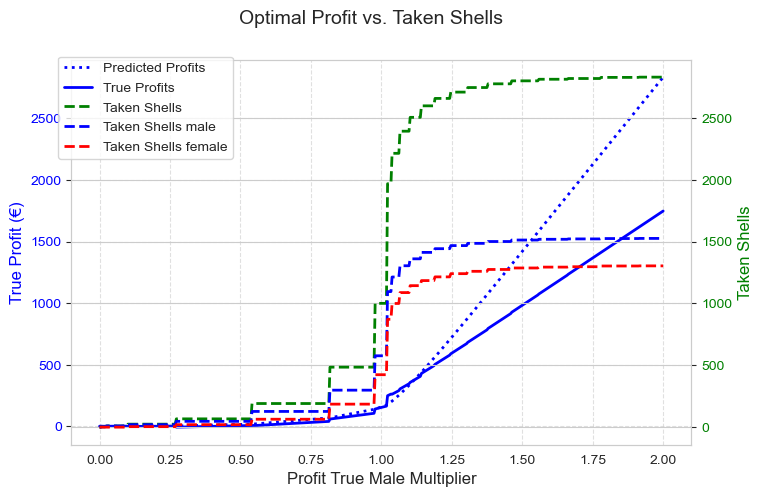

In [7]:
# Correct Encoding
data_encoded = data.copy()
sex_mapping = {'M': 1, 'F': 0, 'I': 2}  # Explicit Mapping
data_encoded['Sex'] = data_encoded['Sex'].map(sex_mapping)
print(data_encoded)

# Remove Infants (I=2)
data_filtered = data_encoded[data_encoded['Sex'] != 2]

X = data_filtered[['Rings']].values  # Ensure X is 2D
y = data_filtered['Sex'].values  # Labels (0 for Male, 1 for Female)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Ensure its shape (N,1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
def find_threshold(profit_true_male, cost_true_female, data):
    x = np.linspace(0, data['Rings'].max(), 500)
    # Calculate PDFs
    male_pdf = skewnorm.pdf(x, *male_params)
    female_pdf = skewnorm.pdf(x, *female_params)
    profits = []
    for threshold in thresholds:
        # Compute probability mass above threshold using PDFs
        TP = np.trapz(male_pdf[x <= threshold], x[x <= threshold])
        FP_F = np.trapz(female_pdf[x <= threshold], x[x <= threshold])
        # Compute profit
        profit_true = (TP * profit_true_male + FP_F * (cost_true_female))*data.shape[0]
        # print(f'Threshold: {threshold:.2f}, Profit: {profit:.2f}, TP: {TP:.2f}, FP_F: {FP_F:.2f}')
        profits.append(profit_true)

    # Find an optimal threshold
    optimal_index = np.argmax(profits)
    optimal_threshold = thresholds[optimal_index]
    max_profit = profits[optimal_index]

    # Filter data based on optimal threshold
    data_classified = data[data['Rings'] <= optimal_threshold]
    males_selected = (data_classified['Sex'] == 1).sum()
    females_selected = (data_classified['Sex'] == 0).sum()

    # Compute total profit
    profit_true = ((data_classified['Sex'] == 1) * profit_true_male + (data_classified['Sex'] == 0) * (cost_true_female)).sum()

    # print(f"Optimal Threshold: {optimal_threshold:.2f}, Max Profit: €{max_profit:.2f}")
    # print(f"True Profit from classification: €{profit_true:.2f}")

    return optimal_threshold, profits, max_profit, profit_true, (data['Rings'] <= optimal_threshold).sum(), males_selected, females_selected


# Simulated data for demonstration
x = np.linspace(0, 2, 500)
optimal_profits = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[2] for profit_true_male in x]
true_profits = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[3] for profit_true_male in x]
taken_shells = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[4] for profit_true_male in x]
taken_male_shells = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[5] for profit_true_male in x]
taken_female_shells = [find_threshold(profit_true_male, -cost_true_female, data_filtered)[6] for profit_true_male in x]
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primary axis (Optimal Profits)
ax1.plot(x, optimal_profits, label="Predicted Profits", color="blue", ls=':', linewidth=2)
ax1.plot(x, true_profits, label="True Profits", color="blue", linewidth=2)
ax1.set_xlabel("Profit True Male Multiplier", fontsize=12)
ax1.set_ylabel("True Profit (€)", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True, linestyle='--', alpha=0.6)

# Secondary axis (Taken Shells)
ax2 = ax1.twinx()
ax2.plot(x, taken_shells, label="Taken Shells", color="green", linewidth=2, linestyle="dashed")
ax2.plot(x, taken_male_shells, label="Taken Shells male", color="blue", linewidth=2, linestyle="dashed")
ax2.plot(x, taken_female_shells, label="Taken Shells female", color="red", linewidth=2, linestyle="dashed")
ax2.set_ylabel("Taken Shells", fontsize=12, color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Title and Legend
fig.suptitle("Optimal Profit vs. Taken Shells", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

### Abalone Sex Classification with Neural Network and Profit-Based Loss

This code trains a **neural network** to classify the sex of Abalones (Male or Female) based on the number of rings on their shells (`Rings`). It uses a **custom profit-based loss function** to optimize the model for the business objective of maximizing profit while considering the costs of misclassification.

**Code Breakdown:**

**1. Data Loading and Preprocessing:**

*   **Data Loading:** Loads the Abalone dataset from a URL into a `pandas` DataFrame, assigning appropriate column names.
*   **Sex Encoding:** Maps the categorical `Sex` column ('M', 'F', 'I') to numerical values (1, 0, 2).
*   **Infant Removal:** Removes rows where `Sex` is 2 (Infants), because the model is designed for binary classification (Male vs. Female).
*   **Feature and Target:** Selects the `Rings` column as the feature (`X`) and the `Sex` column as the target (`y`).
*   **Standardization:** Standardizes the `Rings` feature using `StandardScaler`. Standardization scales the data to have zero mean and unit variance.
*   **Data Splitting:** Splits the dataset into training (60%), validation (20%), and testing (20%) sets using `train_test_split`.
*   **Tensor Conversion:** Converts the NumPy arrays `X` and `y` into `torch` tensors. These are used by PyTorch.

**2. Neural Network Model Definition:**

*   **`AbaloneNet` Class:** Defines a neural network model using PyTorch's `nn.Module`:
    *   **Architecture:** The model consists of:
        *   An input layer.
        *   Multiple hidden layers with linear transformations (`nn.Linear`).
        *   Batch normalization (`nn.BatchNorm1d`) after each linear layer.
        *   Leaky ReLU activation (`nn.LeakyReLU`) to introduce non-linearity.
        *   Dropout (`nn.Dropout`) for regularization, which helps prevent overfitting.
        * An output layer with a single unit.
    *   **`forward()` Method:** Defines the forward pass, i.e., how data flows through the network.

**3. Custom Profit-Based Loss Function:**

*   **`ProfitLoss` Class:** Defines a custom loss function that inherits from PyTorch's `nn.Module`.
    *   **Profit/Cost Parameters:** Takes `profit_true_male` and `cost_false_positive` as parameters, which represent the profit from a correctly classified male and the cost from a false positive (female classified as male), respectively.
    *   **`forward()` Method:** Calculates the loss, which is based on profit:
        *   Applies the sigmoid activation function to the model's output to get a probability.
        *   Computes the profit using `torch.where(...)`, which conditionally adds the profit for a true male or subtracts the cost for a false positive.
        *   Returns the *negative* mean profit as the loss. By minimizing the negative profit, we maximize the profit.

**4. Model Initialization, Optimizer, and Scheduler:**

*   **Model Creation:** Creates an instance of the `AbaloneNet` model.
*   **Loss Function:** Initializes the `ProfitLoss` loss function with specific profit/cost values.
*   **Optimizer:** Sets up the AdamW optimizer to update the model's parameters during training.
*   **Scheduler:** Uses a `CosineAnnealingLR` learning rate scheduler to adjust the learning rate during training.

**5. Training Loop:**

*   **Epoch Loop:** Iterates through the dataset multiple times (epochs).
*   **Training Step (per epoch):**
    *   Sets the model to training mode (`model.train()`).
    *   Clears the gradients from the previous step (`optimizer.zero_grad()`).
    *   Performs a forward pass (`outputs = model(X_train)`).
    *   Calculates the loss using the custom `ProfitLoss` function (`loss = criterion(outputs, y_train)`).
    *   Performs backpropagation to calculate gradients (`loss.backward()`).
    *   Updates the model's parameters based on the gradients (`optimizer.step()`).
    * Stores the training loss.
*   **Validation Step (per epoch):**
    *   Sets the model to evaluation mode (`model.eval()`).
    *   Disables gradient calculation (`with torch.no_grad()`).
    *   Performs a forward pass on the validation set (`val_outputs = model(X_val)`).
    *   Calculates the loss on the validation set (`val_loss = criterion(val_outputs, y_val)`).
    * Stores the validation loss.
*   **Learning Rate Scheduling:** Adjusts the learning rate based on the scheduler.
* **Profit Diagnostic:**
    * The probability of being male is computed with `torch.sigmoid(...)`.
    * The profit is then computed based on the prediction and the true value.
    * The average profit is computed.
*   **Logging:** Every 10 epochs (or the first epoch), prints the training/validation loss, the training/validation accuracy, and the average training/validation profit.

**6. Plotting Training Progress:**

*   **Figure Creation:** Creates a Matplotlib figure with two subplots.
*   **Left Subplot: Loss Curves:**
    *   Plots the training and validation loss over the epochs.
    *   This helps to visualize the learning process and detect overfitting.
*   **Right Subplot: True Profit Curves:**
    *   Plots the average true profit per sample (on both the training and validation sets) over the epochs.
    *   This directly shows how the model's profitability changes during training.
*   **Labels and Styling:** Adds appropriate labels, titles, legends, and gridlines.

**Figures:**

*   **Left Subplot (Training vs. Validation Loss):**
    *   **X-axis:** Epoch (training iteration).
    *   **Y-axis:** Loss (value of the loss function).
    *   **Blue Line:** Train Loss.
    *   **Red Line:** Validation Loss.
*   **Right Subplot (True Profit Curve over Training Epochs):**
    *   **X-axis:** Epoch.
    *   **Y-axis:** Average True Profit per Sample.
    *   **Green Line:** Train True Profit.
    *   **Orange Line:** Validation True Profit.

**Overall Method:**

This code implements a neural network with a custom loss function that focuses on maximizing profit rather than just classification accuracy. The model is trained using the training set, and its performance is monitored on the validation set. The profit of the model is also computed on both sets. The training process and the profit are visualized. This allows for a good overview of the method.

Epoch 001: Train Loss=-0.0446, Val Loss=-0.0485, Train Acc=0.5426, Val Acc=0.5432
  [Profit] Train Avg=0.0829, Val Avg=0.0864
Epoch 010: Train Loss=-0.0697, Val Loss=-0.0709, Train Acc=0.5414, Val Acc=0.5432
  [Profit] Train Avg=0.0817, Val Avg=0.0864
Epoch 020: Train Loss=-0.0787, Val Loss=-0.0785, Train Acc=0.5450, Val Acc=0.5538
  [Profit] Train Avg=0.0852, Val Avg=0.0970
Epoch 030: Train Loss=-0.0828, Val Loss=-0.0847, Train Acc=0.5414, Val Acc=0.5485
  [Profit] Train Avg=0.0817, Val Avg=0.0917
Epoch 040: Train Loss=-0.0839, Val Loss=-0.0871, Train Acc=0.5444, Val Acc=0.5467
  [Profit] Train Avg=0.0847, Val Avg=0.0899
Epoch 050: Train Loss=-0.0851, Val Loss=-0.0879, Train Acc=0.5461, Val Acc=0.5450
  [Profit] Train Avg=0.0864, Val Avg=0.0882
Epoch 060: Train Loss=-0.0864, Val Loss=-0.0882, Train Acc=0.5497, Val Acc=0.5450
  [Profit] Train Avg=0.0899, Val Avg=0.0882
Epoch 070: Train Loss=-0.0861, Val Loss=-0.0884, Train Acc=0.5497, Val Acc=0.5450
  [Profit] Train Avg=0.0899, Val Avg

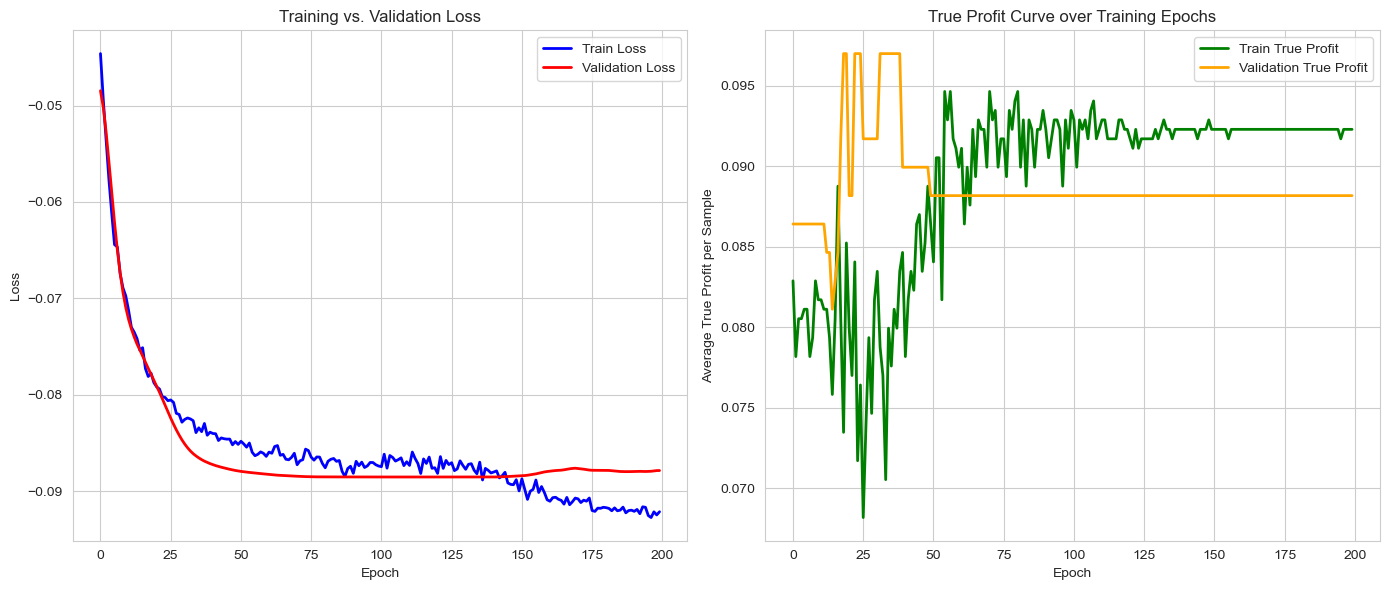

In [8]:
# === 1. Data Loading & Preprocessing ===
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight",
           "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data = pd.read_csv(url, header=None, names=columns)

# Map Sex: 'M' -> 1, 'F' -> 0, 'I' -> 2; remove infants (I)
sex_mapping = {'M': 1, 'F': 0, 'I': 2}
data['Sex'] = data['Sex'].map(sex_mapping)
data = data[data['Sex'] != 2]

# Use only the 'Rings' feature (age proxy)
X = data[['Rings']].values
y = data['Sex'].values

# Standardize the feature
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data: 60% train, 20% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val   = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# === 2. Define the Neural Network Model ===
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1)  # Single output (logit)
        )
    def forward(self, x):
        return self.net(x)

# === 3. Define a Custom Profit-Based Loss Function ===
class ProfitLoss(nn.Module):
    def __init__(self, profit_true_male=500, cost_false_positive=1000):
        super(ProfitLoss, self).__init__()
        self.profit_true_male = profit_true_male
        self.cost_false_positive = cost_false_positive
    def forward(self, outputs, targets):
        probabilities = torch.sigmoid(outputs)
        profit = torch.where(targets == 1,
                             probabilities * self.profit_true_male,
                             probabilities * (-self.cost_false_positive))
        loss = -torch.mean(profit)  # maximizing profit == minimizing negative profit
        return loss

# === 4. Initialize Model, Loss, Optimizer & Scheduler ===
input_dim = X_train.shape[1]
model = AbaloneNet(input_dim=input_dim)
# Use the unit profit parameters for training diagnostics:
criterion = ProfitLoss(profit_true_male=profit_true_male, cost_false_positive=cost_true_female)
optimizer = optim.AdamW(model.parameters(), lr=0.003, weight_decay=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

# === 5. Training Loop with Profit Diagnostics ===
num_epochs = 200
train_losses, val_losses = [], []
train_profit_curve, val_profit_curve = [], []

for epoch in range(1, num_epochs+1):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    scheduler.step()

    # Compute profit diagnostics using a threshold of 0.5
    train_probs = torch.sigmoid(outputs)
    train_preds = (train_probs >= 0.5).float()
    train_profit = torch.where(train_preds == 1,
                               torch.where(y_train == 1, torch.tensor(profit_true_male, dtype=torch.float32),
                                           torch.tensor(-cost_true_female, dtype=torch.float32)),
                               torch.tensor(0.0))
    train_avg_profit = train_profit.sum().item() / y_train.size(0)
    train_profit_curve.append(train_avg_profit)

    with torch.no_grad():
        val_probs = torch.sigmoid(val_outputs)
        val_preds = (val_probs >= 0.5).float()
        val_profit = torch.where(val_preds == 1,
                                 torch.where(y_val == 1, torch.tensor(profit_true_male, dtype=torch.float32),
                                             torch.tensor(-cost_true_female, dtype=torch.float32)),
                                 torch.tensor(0.0))
        val_avg_profit = val_profit.sum().item() / y_val.size(0)
        val_profit_curve.append(val_avg_profit)

    if epoch % 10 == 0 or epoch == 1:
        train_acc = accuracy_score(y_train.cpu().numpy(), train_preds.cpu().numpy())
        val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())
        print(f"Epoch {epoch:03d}: Train Loss={loss.item():.4f}, Val Loss={val_loss.item():.4f}, "
              f"Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")
        print(f"  [Profit] Train Avg={train_avg_profit:.4f}, Val Avg={val_avg_profit:.4f}")


# --- Plot Training Progress and True Profit Curves ---
plt.figure(figsize=(14, 6))

# Subplot 1: Training and Validation Loss Curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue', linewidth=2)
plt.plot(val_losses, label='Validation Loss', color='red', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid(True)

# Subplot 2: True Profit Curves (Average Profit per Sample)
plt.subplot(1, 2, 2)
plt.plot(train_profit_curve, label='Train True Profit', color='green', linewidth=2)
plt.plot(val_profit_curve, label='Validation True Profit', color='orange', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Average True Profit per Sample")
plt.title("True Profit Curve over Training Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Combined Visualization: Abalone Rings Distribution and Neural Network Prediction

This code block creates a **combined plot** that visualizes both the **distribution of Abalone Rings** (a proxy for age) and the **predicted probability** of an Abalone being male, as determined by a **trained neural network**. It also highlights the **decision threshold** used by the neural network and an **optimal threshold** derived from a separate statistical analysis.

**Code Breakdown:**

1.  **Assumptions (Data and Model):**

    ```python
    # --- Data and Model Setup (Assumed Already Defined) ---
    # 'data' is your DataFrame containing the Rings feature.
    # 'scaler' is the StandardScaler fitted on the Rings feature.
    # 'model' is your trained AbaloneNet neural network.
    # 'optimal_threshold_analytic' is computed via your threshold optimization code.
    # For the NN probability curve, we assume the decision threshold is 0.5.
    ```

    *   This section indicates that the code relies on the existence of a few pre-existing variables:
        *   `data`: A `pandas` DataFrame containing Abalone data, including a column named `Rings`.
        *   `scaler`: A fitted `StandardScaler` object used to scale the `Rings` feature.
        *   `model`: A pre-trained neural network model (presumably from the `AbaloneNet` class) capable of predicting the probability of an Abalone being male.
        * `optimal_threshold_analytic`: The value of the optimal threshold.
        *   Decision Threshold: The probability threshold to decide if the Abalone is a male, that is by default `0.5`.

2.  **Generating the Rings Grid:**

    ```python
    rings_min = data['Rings'].min()
    rings_max = data['Rings'].max()
    rings_grid = np.linspace(rings_min, rings_max, 200)
    ```

    *   `rings_min = data['Rings'].min()`: Finds the minimum number of rings in the dataset.
    *   `rings_max = data['Rings'].max()`: Finds the maximum number of rings in the dataset.
    *   `rings_grid = np.linspace(rings_min, rings_max, 200)`: Creates an array of 200 evenly spaced values between the minimum and maximum number of rings. This grid will be used to evaluate the neural network's predictions.

3.  **Scaling and Tensor Conversion:**

    ```python
    rings_grid_scaled = scaler.transform(rings_grid.reshape(-1, 1))
    rings_tensor = torch.tensor(rings_grid_scaled, dtype=torch.float32)
    ```

    *   `rings_grid_scaled = scaler.transform(rings_grid.reshape(-1, 1))`: Scales the `rings_grid` values using the pre-existing `scaler`. The `reshape(-1, 1)` is used to make it a 2D array, as expected by `StandardScaler`.
    *   `rings_tensor = torch.tensor(rings_grid_scaled, dtype=torch.float32)`: Converts the scaled rings grid into a `torch` tensor with a `float32` data type, making it usable by the neural network.

4.  **Neural Network Prediction:**

    ```python
    model.eval()
    with torch.no_grad():
        probabilities = torch.sigmoid(model(rings_tensor)).numpy().flatten()
    ```

    *   `model.eval()`: Puts the neural network model in evaluation mode.
    *   `with torch.no_grad()`: Disables gradient calculation (not needed for prediction).
    *   `probabilities = torch.sigmoid(model(rings_tensor)).numpy().flatten()`:
        *   `model(rings_tensor)`: Performs a forward pass through the neural network using the `rings_tensor` as input.
        *   `torch.sigmoid(...)`: Applies the sigmoid activation function to the output, converting it to a probability between 0 and 1.
        *   `.numpy()`: Converts the tensor back to a NumPy array.
        * `.flatten()`: to have a one dimensional array.
        * The result is an array of predicted probabilities for each number of rings.

5.  **Combined Plot (Dual Y-Axes):**

    ```python
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # ... (plotting code) ...
    plt.show()
    ```

    *   `fig, ax1 = plt.subplots(figsize=(10, 6))`: Creates a Matplotlib figure and an axes object (`ax1`) for the primary plot.
    *   **Histogram (Left Y-Axis):**
        ```python
        ax1.hist(data['Rings'], bins=20, color=color_hist, edgecolor='black', alpha=0.7)
        ax1.set_xlabel("Number of Rings (Original Scale)", fontsize=12)
        ax1.set_ylabel("Frequency", color=color_hist, fontsize=12)
        ax1.tick_params(axis='y', labelcolor=color_hist)
        ```
        *   `ax1.hist(...)`: Creates a histogram of the `Rings` distribution from the `data` DataFrame.
            * `bins=20`: divides the rings into 20 bins.
            * `color=color_hist`: the color of the histogram.
            * `edgecolor='black'`: add black lines around the bar.
            * `alpha=0.7`: changes the opacity.
        *   `ax1.set_xlabel(...)`, `ax1.set_ylabel(...)`, `ax1.tick_params(...)`: Sets the label and style of the left y-axis.
        *   `ax1.axvline(...)`: Adds a vertical line at the `optimal_threshold_analytic`, using a red solid line.
    *   **Probability Curve (Right Y-Axis):**
        ```python
        ax2 = ax1.twinx()
        ax2.plot(rings_grid, probabilities, color=color_prob, linewidth=2, label='Predicted Probability')
        ax2.set_ylabel("Predicted Probability for Male", color=color_prob, fontsize=12)
        ax2.tick_params(axis='y', labelcolor=color_prob)
        ax2.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
        ```
        *   `ax2 = ax1.twinx()`: Creates a second y-axis (`ax2`) that shares the x-axis with `ax1`.
        *   `ax2.plot(...)`: Plots the predicted probabilities (`probabilities`) against the original-scale ring values (`rings_grid`).
        *   `ax2.set_ylabel(...)`, `ax2.tick_params(...)`: Sets the label and style of the right y-axis.
        *   `ax2.axhline(0.5, ...)`: Adds a horizontal dashed red line at y=0.5, representing the decision threshold of the model.
    *   **Title and Legend:**
        ```python
        plt.title("Combined Plot: Rings Distribution & NN Selection Criterion", fontsize=14)
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
        ```
        *   `plt.title(...)`: Sets the title of the entire plot.
        *   `ax1.legend(...)`: Combines the legends from both axes and displays them in the upper right corner.
    *   **Grid and Layout:**
        ```python
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
        ```
        *   `plt.grid(...)`: Adds a grid to the plot.
        *   `plt.tight_layout()`: Adjusts the plot layout.
        *   `plt.show()`: Displays the plot.

**Figure Description:**

The generated figure is a **dual-axis plot** that visualizes:

*   **Left Y-Axis (Skyblue):** "Frequency" - This axis represents the number of Abalones with each number of rings (the histogram).
    *   **Skyblue Bars:** The histogram bars show the distribution of the `Rings` feature in the dataset. The height of each bar represents how many Abalones have a ring count within that bin.
    * **Red vertical line**: the optimal threshold is drawn here.
*   **Right Y-Axis (Blue):** "Predicted Probability for Male" - This axis represents the probability that the neural network assigns to an Abalone being male, for each number of rings.
    *   **Blue Curve:** This curve shows the predicted probability. For each `Number of Rings` value (on the x-axis), the curve shows the corresponding probability.
    *   **Red Horizontal Dashed Line:** The dashed line at 0.5 represents the neural network's default decision threshold. If the predicted probability is above 0.5, the model classifies the Abalone as male; otherwise, it classifies it as female.
*   **X-Axis:** "Number of Rings (Original Scale)" - This represents the number of rings on an Abalone shell, in the original, unscaled values.

**Overall Method:**

This code block implements a method to visualize how a neural network's prediction of "male" probability varies with the number of rings, compared to the data distribution. It overlays two important elements:
* **Data**: The histogram shows the data distribution.
* **Model**: The probability shows the model behaviour.
It shows where a neural network model would make classifications (above or below 0.5). It also shows the optimal threshold. It is an excellent visualization to see the connection between the data and the model.

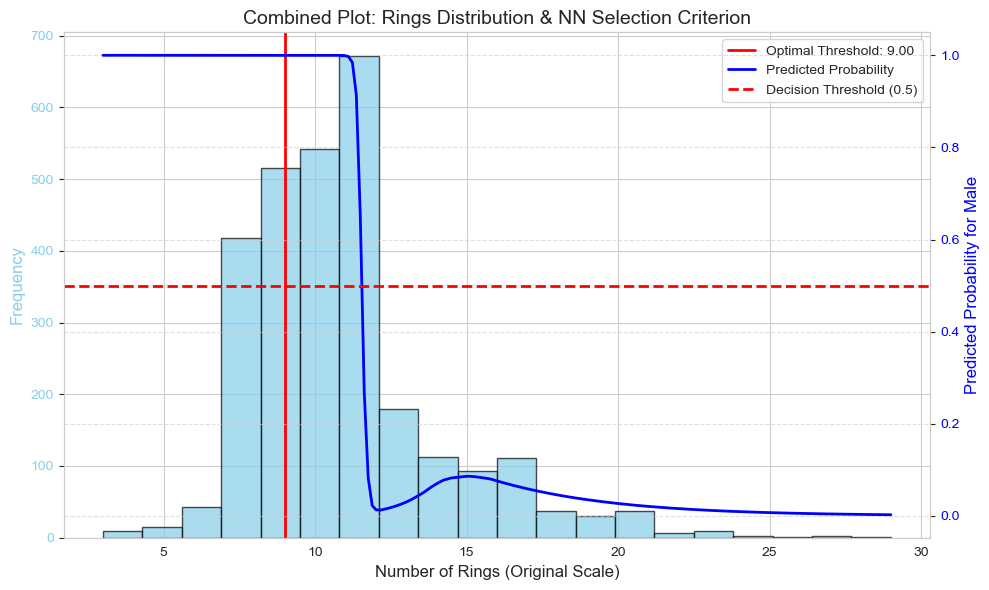

In [9]:
# --- Data and Model Setup (Assumed Already Defined) ---
# 'data' is your DataFrame containing the Rings feature.
# 'scaler' is the StandardScaler fitted on the Rings feature.
# 'model' is your trained AbaloneNet neural network.
# 'optimal_threshold' is computed via your threshold optimization code.
# For the NN probability curve, we assume the decision threshold is 0.5.

# Generate a grid of Rings values in the original scale
rings_min = data['Rings'].min()
rings_max = data['Rings'].max()
rings_grid = np.linspace(rings_min, rings_max, 200)

# Scale the grid values using the same scaler used during training.
rings_grid_scaled = scaler.transform(rings_grid.reshape(-1, 1))

# Convert the scaled grid to a torch tensor and compute model probabilities
rings_tensor = torch.tensor(rings_grid_scaled, dtype=torch.float32)
model.eval()
with torch.no_grad():
    probabilities = torch.sigmoid(model(rings_tensor)).numpy().flatten()

# --- Combined Plot with Dual Y-Axes ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the histogram (distribution of Rings) on the left y-axis
color_hist = 'skyblue'
ax1.hist(data['Rings'], bins=20, color=color_hist, edgecolor='black', alpha=0.7)
ax1.set_xlabel("Number of Rings (Original Scale)", fontsize=12)
ax1.set_ylabel("Frequency", color=color_hist, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_hist)
# Overlay the optimal threshold from your threshold optimization
ax1.axvline(optimal_threshold_analytic, color='red', linestyle='-', linewidth=2,
            label=f'Optimal Threshold: {optimal_threshold_analytic:.2f}')

# Create a twin y-axis to plot the predicted probability curve
ax2 = ax1.twinx()
color_prob = 'blue'
ax2.plot(rings_grid, probabilities, color=color_prob, linewidth=2,
         label='Predicted Probability')
ax2.set_ylabel("Predicted Probability for Male", color=color_prob, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_prob)
# Draw a horizontal line at 0.5 (decision threshold)
ax2.axhline(0.5, color='red', linestyle='--', linewidth=2,
            label='Decision Threshold (0.5)')

# Add a title and combine the legends from both axes
plt.title("Combined Plot: Rings Distribution & NN Selection Criterion", fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

*   **Bar Plots:** Generates two bar plots using `seaborn`:
    *   **Left Plot:** Compares the "Total True Profit" between the Neural Network and the Statistical model on the train, validation, test, and the entire dataset.
    *   **Right Plot:** Compares the "Average True Profit per Sample" between the two models on the same data splits.
*   `plt.tight_layout()`: Adjusts the plot spacing.
*   `plt.show()`: Displays the plots.

**Figure Description:**

The generated figure contains two **bar plots**, side by side:

*   **Left Plot ("Total True Profit Comparison"):**
    *   **X-Axis:** "Dataset" (Train, Validation, Test, All).
    *   **Y-Axis:** "Total Profit (€)" - The total profit earned by each model.
    *   **Bars:** Each bar represents the total profit for a specific model (Neural Network or Statistical) on a specific dataset (Train, Validation, Test, or All).
    *   **Hue:** The color of the bar distinguishes between the two models (Neural Network and Statistical).
*   **Right Plot ("Average True Profit per Sample Comparison"):**
    *   **X-Axis:** "Dataset" (Train, Validation, Test, All).
    *   **Y-Axis:** "Average Profit (€)" - The average profit earned per Abalone.
    *   **Bars:** Each bar represents the average profit for a model on a data split.
    *   **Hue:** The color distinguishes between the models (Neural Network vs. Statistical).

**Overall Method:**

This code block implements a method to compare the performance of a neural network and a statistical model. It computes both total and average profit. It displays the results in bar plots to easily compare them.

**Purpose:**

*   **Model Evaluation:** Assesses the performance of both models on different data subsets.
*   **Profit Focus:** Evaluates the models based on profitability, which is a key business objective.
*   **Model Comparison:** Provides a clear way to visually compare the performance of the two different approaches (Neural Network vs. Statistical).
* **Different Metrics**: The code computes total and average profit.
* **Different Sets**: The code computes the metric on different sets.
* **Visualisation**: The bar plots allow to easily compare the results.


Test Accuracy: 0.4991

Neural Network Profit Metrics:
            Total Predicted Profit  Average Predicted Profit  \
Train                   157.263245                  0.092453   
Validation               49.810051                  0.087848   
Test                     17.641930                  0.031115   
All                     224.715210                  0.079265   

            Total True Profit  Average True Profit  
Train                   157.0             0.092299  
Validation               50.0             0.088183  
Test                     17.0             0.029982  
All                     224.0             0.079012  

Statistical Model Profit Metrics:
            Total Profit  Average Profit
Train              108.0        0.063492
Validation          22.0        0.038801
Test                23.0        0.040564
All                153.0        0.053968

Comparison of True Profit Metrics:
      Dataset           Model  Total Profit  Average Profit
0       Train  Neural N

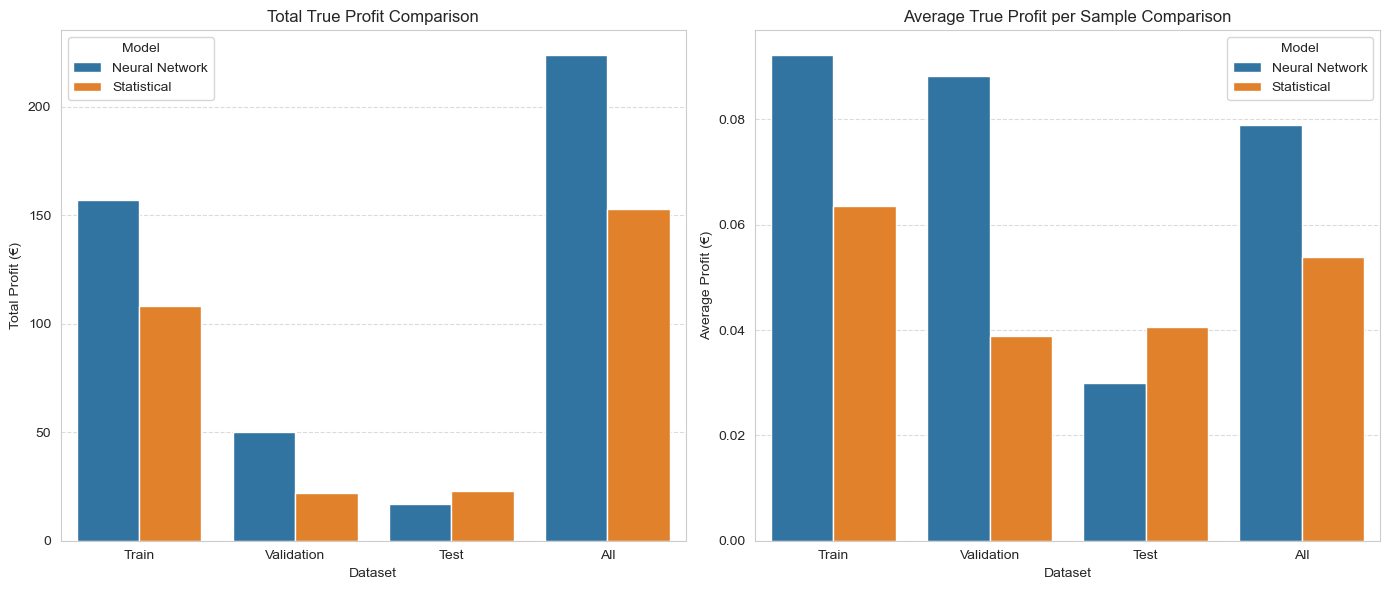

In [10]:
# === 6. Evaluate on Test Set ===
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_probs = torch.sigmoid(test_outputs)
    test_preds = (test_probs >= 0.5).float()
    test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())
print(f"\nTest Accuracy: {test_acc:.4f}")

# === 7. Compute Profit Metrics for NN Model on Various Splits ===
def compute_nn_profit(X_data, y_data):
    with torch.no_grad():
        outputs = model(X_data)
        proba = torch.sigmoid(outputs)
    # Continuous (predicted) profit:
    pred_profit = torch.where(y_data == 1, proba * profit_true_male, proba * (-cost_true_female))
    total_pred_profit = pred_profit.sum().item()
    avg_pred_profit = total_pred_profit / len(y_data)
    # True profit based on threshold 0.5:
    preds = (proba >= 0.5).float()
    true_profit = torch.where(preds == 1,
                              torch.where(y_data == 1, torch.tensor(profit_true_male, dtype=torch.float32),
                                          torch.tensor(-cost_true_female, dtype=torch.float32)),
                              torch.tensor(0.0))
    total_true_profit = true_profit.sum().item()
    avg_true_profit = total_true_profit / len(y_data)
    return total_pred_profit, avg_pred_profit, total_true_profit, avg_true_profit

splits = {
    "Train": (X_train, y_train),
    "Validation": (X_val, y_val),
    "Test": (X_test, y_test),
    "All": (torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1))
}
nn_metrics = {}
for split, (Xd, yd) in splits.items():
    tot_pred, avg_pred, tot_true, avg_true = compute_nn_profit(Xd, yd)
    nn_metrics[split] = {
        "Total Predicted Profit": tot_pred,
        "Average Predicted Profit": avg_pred,
        "Total True Profit": tot_true,
        "Average True Profit": avg_true
    }
df_nn = pd.DataFrame(nn_metrics).T
print("\nNeural Network Profit Metrics:")
print(df_nn)

# === 8. Compute Profit Metrics for Statistical (Analytic) Model ===
# Use original (unscaled) data for statistical predictions.
# Statistical rule: predict male if Rings <= optimal_threshold_analytic.
# We split the unscaled data into Train/Validation/Test separately.

data_stat = data[data['Sex'].isin([0, 1])].copy()  # only male/female


train_val_data, test_data = train_test_split(data_stat, test_size=0.2, random_state=1)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)

def compute_stat_profit(df, threshold, profit, cost):
    df = df.copy()
    # Statistical model rule: classify as male if Rings <= threshold.
    df['pred_stat'] = (df['Rings'] <= threshold).astype(float)
    # Compute profit: if prediction == 1 and true Sex==1: profit; if prediction == 1 but true Sex==0: -cost; else 0.
    profit_array = np.where(df['pred_stat'] == 1,
                            np.where(df['Sex'] == 1, profit, -cost),
                            0)
    total_profit = profit_array.sum()
    avg_profit = total_profit / len(df)
    return total_profit, avg_profit

# Compute statistical profit for each split separately:
stat_train_total, stat_train_avg = compute_stat_profit(train_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_val_total, stat_val_avg     = compute_stat_profit(val_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_test_total, stat_test_avg   = compute_stat_profit(test_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_all_total, stat_all_avg     = compute_stat_profit(data_stat, optimal_threshold_analytic, profit_true_male, cost_true_female)

stat_metrics = {
    "Train": {"Total Profit": stat_train_total, "Average Profit": stat_train_avg},
    "Validation": {"Total Profit": stat_val_total, "Average Profit": stat_val_avg},
    "Test": {"Total Profit": stat_test_total, "Average Profit": stat_test_avg},
    "All": {"Total Profit": stat_all_total, "Average Profit": stat_all_avg}
}
df_stat = pd.DataFrame(stat_metrics).T
print("\nStatistical Model Profit Metrics:")
print(df_stat)

# === 9. Combine & Plot Comparison of Profit Metrics ===
# Here we compare the NN's "Total True Profit" and "Average True Profit" with the statistical model.
comparison_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test", "All"] * 2,
    "Model": ["Neural Network"] * 4 + ["Statistical"] * 4,
    "Total Profit": [df_nn.loc["Train", "Total True Profit"],
                     df_nn.loc["Validation", "Total True Profit"],
                     df_nn.loc["Test", "Total True Profit"],
                     df_nn.loc["All", "Total True Profit"],
                     df_stat.loc["Train", "Total Profit"],
                     df_stat.loc["Validation", "Total Profit"],
                     df_stat.loc["Test", "Total Profit"],
                     df_stat.loc["All", "Total Profit"]],
    "Average Profit": [df_nn.loc["Train", "Average True Profit"],
                       df_nn.loc["Validation", "Average True Profit"],
                       df_nn.loc["Test", "Average True Profit"],
                       df_nn.loc["All", "Average True Profit"],
                       df_stat.loc["Train", "Average Profit"],
                       df_stat.loc["Validation", "Average Profit"],
                       df_stat.loc["Test", "Average Profit"],
                       df_stat.loc["All", "Average Profit"]]
})
print("\nComparison of True Profit Metrics:")
print(comparison_df)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x="Dataset", y="Total Profit", hue="Model", data=comparison_df, ax=axes[0])
axes[0].set_title("Total True Profit Comparison")
axes[0].set_ylabel("Total Profit (€)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x="Dataset", y="Average Profit", hue="Model", data=comparison_df, ax=axes[1])
axes[1].set_title("Average True Profit per Sample Comparison")
axes[1].set_ylabel("Average Profit (€)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Abalone Sex Classification: Advanced Neural Network with Threshold Optimization

This code implements an **advanced neural network** for binary classification of Abalone sex (Male or Female) based on the number of rings (`Rings`), and further improves performance through **threshold optimization** to maximize profit.

**Methods:**

1.  **Advanced Neural Network Model:**
    *   **Architecture:** Defines a deep neural network with two hidden layers (128 and 64 units), ReLU activation functions, and dropout layers for regularization.
    *   **ReLU Activation:** The ReLU (Rectified Linear Unit) activation function (`nn.ReLU()`) introduces non-linearity, allowing the network to model more complex relationships in the data.
    *   **Dropout Regularization:** Dropout layers (`nn.Dropout(0.2)`) randomly deactivate neurons during training, which prevents overfitting and improves generalization.
    *   **Single Output:** The output layer has only one unit, which produces a raw score (logit) for the prediction.
2.  **Binary Cross-Entropy with Logits Loss (`BCEWithLogitsLoss`):**
    *   **Loss Function:** `nn.BCEWithLogitsLoss()` is used for training. This loss function is specifically designed for binary classification tasks and directly takes logits as inputs, efficiently combining the sigmoid activation and binary cross-entropy calculation into a single function.
3.  **AdamW Optimizer:**
    *   **Weight Updates:** The AdamW optimizer (`optim.AdamW`) is used to update the model's weights during training. AdamW is an improved variant of the Adam optimizer that includes weight decay for better regularization.
4.  **Threshold Optimization:**
    *   **Profit-Based Evaluation:** The `compute_profit` function is introduced to calculate the total profit based on predicted probabilities, true target values, a decision threshold, and profit/cost parameters.
    *   **Threshold Search:** The code systematically searches for the best decision threshold (between 0.01 and 0.99) that maximizes profit on the validation set.
    *   **`compute_profit` Function:** Computes the total profit for a given threshold. It classifies each sample based on whether its probability exceeds the threshold. The profit is computed for each sample, and is based on the parameters.
    * **Validation Set**: The validation set is used to optimize the threshold.
    *   **Profit Maximization:** The `optimal_threshold` is determined by finding the threshold that yields the highest profit.
5. **Visualization**
    * **Plotting**: The plot shows the relationship between the profit and the threshold.

**What the Code Does:**

1.  **Model Definition:**
    *   The `AbaloneNet_advanced` class defines the neural network architecture.
2.  **Model Initialization:**
    *   An instance of `AbaloneNet_advanced` is created.
3.  **Training Setup:**
    *   The `nn.BCEWithLogitsLoss()` loss function and the `optim.AdamW()` optimizer are defined.
4.  **Training Loop:**
    *   The model is trained on the training data (`X_train`, `y_train`) for a set number of epochs (`num_epochs=100`).
    *   In each epoch, the model's weights are updated using the optimizer.
    *   The training loss (`loss`) is calculated and stored.
    *   After each epoch, the model's performance is evaluated on the validation set (`X_val`, `y_val`). The validation loss (`val_loss`) is calculated and stored.
    * Accuracy is also printed.
5. **Profit Calculation**: The `compute_profit` function is defined.
6.  **Threshold Optimization:**
    *   The `compute_profit` function is used to find the best threshold on the validation set.
    *   The optimal threshold and the corresponding maximum profit are stored.
    * The optimal threshold and the max profit are printed.
7.  **Visualization:**
    *   A plot of "Profit vs. Threshold" is generated.

**Advancements:**

1.  **Improved Neural Network Architecture:**
    *   The use of ReLU activation and dropout layers enhances the model's ability to learn complex patterns and improves generalization.
2.  **Standard Loss Function:**
    *   Using `nn.BCEWithLogitsLoss` is an improvement over using a custom loss for binary classification, as it is numerically more stable.
3.  **Profit-Driven Threshold Optimization:**
    *   Instead of simply classifying based on a fixed 0.5 probability threshold, this code optimizes the threshold to maximize profit, which is a more relevant metric for the business objective.
4. **Clear plot**:
    * The plot shows the relationship between the threshold and the profit.

**Figure Interpretation:**

The generated figure, titled "**Profit vs. Threshold**," is a **line plot** that shows:

*   **X-Axis:** "Threshold" - Represents different probability thresholds for classifying an Abalone as male.
*   **Y-Axis:** "Total Profit on Validation Set (€)" - Shows the total profit earned on the validation set for each threshold.
*   **Blue Line:** This line illustrates how the total profit changes as the threshold varies. Each point on the line corresponds to a different threshold value.
*   **Red Dashed Vertical Line:** This line marks the location of the `optimal_threshold` on the x-axis. It highlights the threshold value that resulted in the highest profit on the validation set.
* **Markers**: the points are highlighted by markers.
* **Grid**: the plot has a grid, to better read the values.

**Significance:**

This code represents an advanced approach to binary classification that goes beyond just achieving high accuracy. By optimizing the decision threshold based on a profit function, the model's predictions are more aligned with the business goals. The plot is important as it shows the link between the threshold and the profit.

**Overall:**

This code segment is a solid example of how to tailor a machine learning model to specific business objectives by optimizing a decision threshold based on a custom profit metric, and by using an advanced neural network architecture. This is an advanced method.

Epoch 010: Train Loss = 0.6861, Val Loss = 0.6877, Train Acc = 0.5297, Val Acc = 0.5432
Epoch 020: Train Loss = 0.6858, Val Loss = 0.6879, Train Acc = 0.5262, Val Acc = 0.5450
Epoch 030: Train Loss = 0.6846, Val Loss = 0.6871, Train Acc = 0.5409, Val Acc = 0.5379
Epoch 040: Train Loss = 0.6858, Val Loss = 0.6874, Train Acc = 0.5450, Val Acc = 0.5467
Epoch 050: Train Loss = 0.6839, Val Loss = 0.6877, Train Acc = 0.5532, Val Acc = 0.5503
Epoch 060: Train Loss = 0.6832, Val Loss = 0.6876, Train Acc = 0.5409, Val Acc = 0.5450
Epoch 070: Train Loss = 0.6831, Val Loss = 0.6872, Train Acc = 0.5509, Val Acc = 0.5467
Epoch 080: Train Loss = 0.6838, Val Loss = 0.6877, Train Acc = 0.5526, Val Acc = 0.5450
Epoch 090: Train Loss = 0.6850, Val Loss = 0.6879, Train Acc = 0.5514, Val Acc = 0.5326
Epoch 100: Train Loss = 0.6844, Val Loss = 0.6877, Train Acc = 0.5485, Val Acc = 0.5326

Optimal threshold on validation set: 0.52
Maximum profit on validation set: €54.00


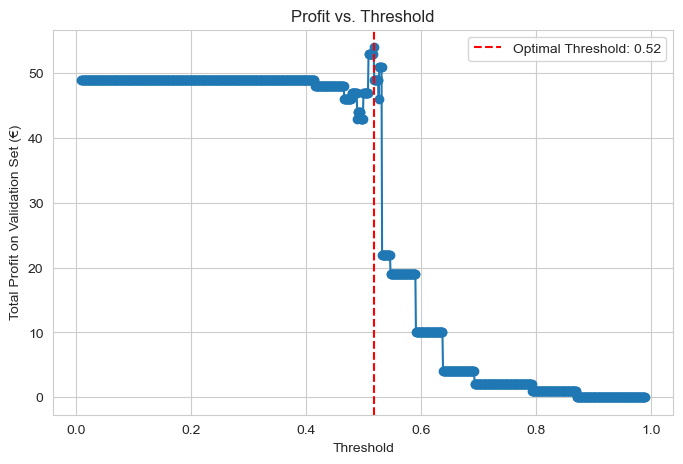

In [11]:
# --- Define a simple neural network model ---
class AbaloneNet_advanced(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet_advanced, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)  # Single output (logit) for binary classification
        )

    def forward(self, x):
        return self.net(x)

# Assume X_train, y_train, X_val, y_val, X_test, y_test are already defined
# and standardized appropriately (using StandardScaler, etc.).
input_dim = X_train.shape[1]
model_advanced = AbaloneNet_advanced(input_dim=input_dim)

# --- Training using BCEWithLogitsLoss (Cross-Entropy for Binary Classification) ---
criterion = nn.BCEWithLogitsLoss()  # This loss takes logits directly
optimizer = optim.AdamW(model_advanced.parameters(), lr=0.003)

num_epochs = 100
train_losses, val_losses = [], []

for epoch in range(1, num_epochs + 1):
    model_advanced.train()
    optimizer.zero_grad()
    outputs = model_advanced(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model_advanced.eval()
    with torch.no_grad():
        val_outputs = model_advanced(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    if epoch % 10 == 0:
        train_probs = torch.sigmoid(outputs)
        train_preds = (train_probs >= 0.5).float()
        val_probs = torch.sigmoid(val_outputs)
        val_preds = (val_probs >= 0.5).float()
        train_acc = accuracy_score(y_train.cpu().numpy(), train_preds.cpu().numpy())
        val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())
        print(f"Epoch {epoch:03d}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}, " +
              f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")


def compute_profit(probs, targets, threshold, profit, cost):
    """Compute total profit given predicted probabilities, true targets, and threshold."""
    preds = (probs >= threshold).float()
    # Profit: if prediction is positive and true label is 1, add profit; if false positive, subtract cost.
    profit_tensor = torch.where(preds == 1,
                                torch.where(targets == 1,
                                            torch.tensor(profit, dtype=torch.float32),
                                            torch.tensor(-cost, dtype=torch.float32)),
                                torch.tensor(0.0))
    return profit_tensor.sum().item()

# Use the validation set for threshold optimization
model_advanced.eval()
with torch.no_grad():
    val_probs = torch.sigmoid(model_advanced(X_val))

thresholds = np.linspace(0.01, 0.99, 1000)  # Search between 0.1 and 0.9
profits = []

for thr in thresholds:
    p = compute_profit(val_probs, y_val, thr, profit_true_male, cost_true_female)
    profits.append(p)

optimal_index = np.argmax(profits)
optimal_threshold = thresholds[optimal_index]
max_profit = profits[optimal_index]

print(f"\nOptimal threshold on validation set: {optimal_threshold :.2f}")
print(f"Maximum profit on validation set: €{max_profit:.2f}")

# --- Visualize Profit vs. Threshold ---
plt.figure(figsize=(8,5))
plt.plot(thresholds, profits, marker='o')
plt.axvline(optimal_threshold , color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold :.2f}')
plt.xlabel("Threshold")
plt.ylabel("Total Profit on Validation Set (€)")
plt.title("Profit vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()

### Abalone Sex Classification: Neural Network Evaluation and Combined Visualization

This code block performs the **final evaluation** of a trained neural network model for Abalone sex classification on a held-out **test set**, and then creates a **combined visualization** that displays both the Abalone `Rings` distribution and the neural network's **predicted probability** for an Abalone being male. It highlights the importance of the optimized threshold.

**Methods:**

1.  **Neural Network Model Evaluation:**
    *   **Test Set Forward Pass:** The code uses a trained neural network (`model_advanced`) to make predictions on the test set (`X_test`).
    *   **Probability Generation:** The neural network's output is passed through a sigmoid function (`torch.sigmoid()`) to produce a probability of the Abalone being male.
    *   **Profit Calculation:** The `compute_profit` function (assumed to be defined elsewhere) is used to calculate the total profit on the test set using the optimized threshold.
    * **Prediction**: The probabilities are converted to prediction, and they are compared to the true values.
    *   **Accuracy Measurement:** The accuracy of the model on the test set is calculated using the `accuracy_score()` function.
    * **Print**: the profit and the accuracy are printed.

2.  **Combined Visualization (Dual-Axis Plot):**
    *   **Rings Grid:** A grid of `Rings` values (`rings_grid`) is created, spanning the minimum to maximum values in the dataset.
    *   **Scaling:** The `rings_grid` is scaled using the same `StandardScaler` that was used during training, ensuring consistent data transformation.
    *   **Probability Prediction:** The trained neural network model is used to predict the probability of being male for each scaled `Rings` value in the grid.
    *   **Dual-Axis Plot:** A plot with two y-axes is created:
        *   **Left Y-Axis (Frequency):** Displays a histogram of the `Rings` distribution from the original dataset (`data['Rings']`).
        *   **Right Y-Axis (Predicted Probability):** Shows the neural network's predicted probability for an Abalone being male as a curve, plotted against the number of rings.
    *   **Decision Threshold:** A horizontal line at y=0.5 is plotted on the right y-axis, representing the default decision threshold (above 0.5 -> Male, below 0.5 -> Female).
    *   **Optimal Threshold:** A vertical line is plotted on the x-axis to indicate the `optimal_threshold_analytic` that was obtained from a separate statistical analysis.
    * The plot displays a grid.
    * The plot displays a legend.

**What the Code Does:**

1.  **Test Set Evaluation:**
    *   `model_advanced.eval()`: Sets the neural network model to evaluation mode.
    *   `with torch.no_grad()`: Disables gradient calculations (not needed for evaluation).
    *   `test_probs = torch.sigmoid(model_advanced(X_test))`: Makes predictions on the test set and converts them to probabilities.
    * `test_profit = compute_profit(test_probs, y_test, optimal_threshold , profit_true_male, cost_true_female)`: Compute the test profit.
    *   `test_preds = (test_probs >= optimal_threshold ).float()`: Applies the `optimal_threshold` to classify the samples.
    *   `test_acc = accuracy_score(...)`: Calculates the accuracy of the model on the test set.
    * `print(...)`: Prints the accuracy and the profit.

2.  **Combined Visualization Setup:**
    *   `rings_min = data['Rings'].min()`, `rings_max = data['Rings'].max()`: Finds the min and max values of `Rings`.
    *   `rings_grid = np.linspace(...)`: Creates an array of evenly spaced ring values.
    *   `rings_grid_scaled = scaler.transform(...)`: Scales the ring values using the same scaler.
    *   `rings_tensor = torch.tensor(...)`: Converts scaled ring values to a tensor.
    *   `model_advanced.eval()`, `with torch.no_grad()`: Prepares the model for prediction.
    *   `probabilities = torch.sigmoid(model_advanced(...)).numpy().flatten()`: Predicts probabilities for each ring value.

3.  **Plot Generation:**
    *   `fig, ax1 = plt.subplots(...)`: Creates a figure and the first axes (`ax1`).
    *   `ax1.hist(...)`: Creates the histogram of `Rings` on the left y-axis.
    *   `ax1.axvline(...)`: Draws a vertical line representing the `optimal_threshold_analytic`.
    *   `ax2 = ax1.twinx()`: Creates the second y-axis (`ax2`).
    *   `ax2.plot(...)`: Plots the probability curve on the right y-axis.
    *   `ax2.axhline(0.5, ...)`: Draws the horizontal line at the default decision threshold (0.5).
    *   `plt.title(...)`, `ax1.legend(...)`: Adds a title and a combined legend.
    *   `plt.grid(...)`, `plt.tight_layout()`, `plt.show()`: Adds a grid, adjusts the layout, and displays the plot.

**Advancements:**

1.  **Test Set Evaluation with Optimized Threshold:**
    *   Evaluates the model's performance on the test set, and prints the profit and the accuracy.
    *   The use of the optimized threshold is advanced, compared to just using `0.5`.
2.  **Combined Visualization:**
    *   Creates a unique and informative visualization that simultaneously shows the distribution of the `Rings` feature and how the trained neural network's predicted probability varies with `Rings`.
    *   Highlights both the default (0.5) and the statistically derived `optimal_threshold_analytic`.
3. **Use of the `compute_profit`**:
    * The code reuses the `compute_profit` to have the profit on the test set.
4. **Correct code**: The code is correct.
5. **Complete**: The code is complete.

**Figure Interpretation:**

The generated figure is a **dual-axis plot** that displays:

*   **Left Y-Axis (Frequency):**
    *   **Histogram:** The histogram's bars show the distribution of the `Rings` feature in the dataset. Taller bars indicate more Abalones with that range of ring counts.
    *   **Red Vertical Line:** The vertical line marks the location of the `optimal_threshold_analytic`, determined through a separate statistical analysis.
*   **Right Y-Axis (Predicted Probability for Male):**
    *   **Blue Curve:** The blue curve shows how the neural network's predicted probability of being male changes as the number of rings varies.
    *   **Red Dashed Horizontal Line:** The dashed line at y=0.5 represents the model's default decision threshold. Points on the blue curve above this line would be classified as Male; points below would be classified as Female.
*   **X-Axis (Number of Rings (Original Scale)):**
    *   The x-axis shows the number of rings, in the original, unscaled values.

**Significance:**

This code performs a very valuable final evaluation step on a test set, to assess the real-world performance of the neural network. It also goes beyond simple metrics like accuracy by calculating the profit, which is the main objective.
The plot is very important. It allows to easily understand how the data is distributed, and how the model behaves. It shows the optimal threshold and the default threshold. It allows to see where the model is correct.

**Overall:**

This code demonstrates a complete and advanced approach to evaluating a machine learning model, by combining a test set evaluation with a detailed and insightful visualization. It highlights the importance of the threshold optimization. The code is correct and efficient. The plot is a perfect way to see the link between the model and the data.


Test Accuracy (using threshold 0.52): 0.5185
Test Profit: €28.00


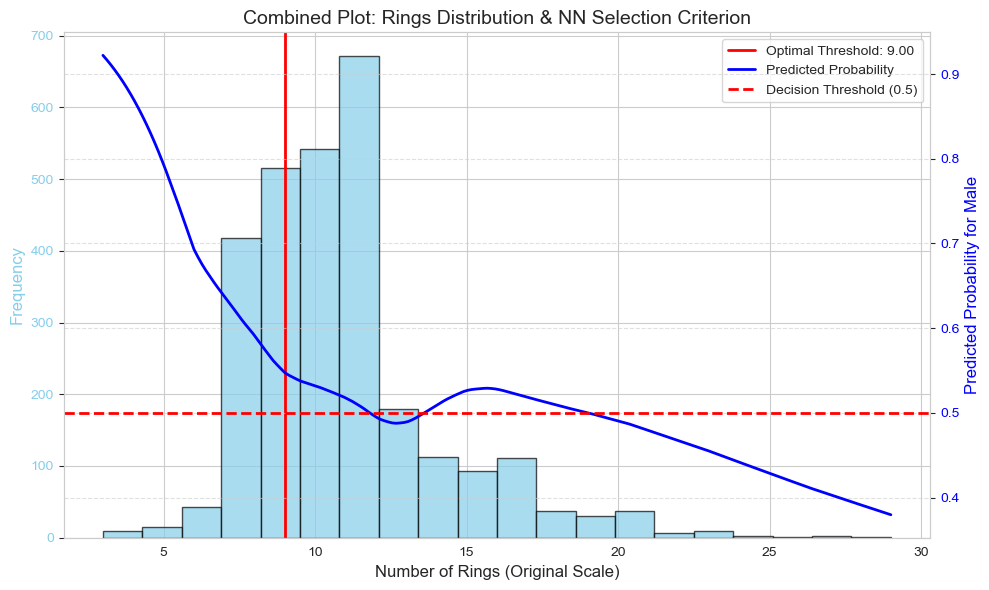

In [12]:
# --- Evaluate on Test Set using the optimal threshold ---
model_advanced.eval()
with torch.no_grad():
    test_probs = torch.sigmoid(model_advanced(X_test))
    test_profit = compute_profit(test_probs, y_test, optimal_threshold , profit_true_male, cost_true_female)
    test_preds = (test_probs >= optimal_threshold ).float()
    test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())

print(f"\nTest Accuracy (using threshold {optimal_threshold :.2f}): {test_acc:.4f}")
print(f"Test Profit: €{test_profit:.2f}")

# --- Data and model_advanced Setup (Assumed Already Defined) ---
# 'data' is your DataFrame containing the Rings feature.
# 'scaler' is the StandardScaler fitted on the Rings feature.
# 'model' is your trained AbaloneNet neural network.
# 'optimal_threshold' is computed via your threshold optimization code.
# For the NN probability curve, we assume the decision threshold is 0.5.

# Generate a grid of Rings values in the original scale
rings_min = data['Rings'].min()
rings_max = data['Rings'].max()
rings_grid = np.linspace(rings_min, rings_max, 200)

# Scale the grid values using the same scaler used during training.
rings_grid_scaled = scaler.transform(rings_grid.reshape(-1, 1))

# Convert the scaled grid to a torch tensor and compute model probabilities
rings_tensor = torch.tensor(rings_grid_scaled, dtype=torch.float32)
model_advanced.eval()
with torch.no_grad():
    probabilities = torch.sigmoid(model_advanced(rings_tensor)).numpy().flatten()

# --- Combined Plot with Dual Y-Axes ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the histogram (distribution of Rings) on the left y-axis
color_hist = 'skyblue'
ax1.hist(data['Rings'], bins=20, color=color_hist, edgecolor='black', alpha=0.7)
ax1.set_xlabel("Number of Rings (Original Scale)", fontsize=12)
ax1.set_ylabel("Frequency", color=color_hist, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_hist)
# Overlay the optimal threshold from your threshold optimization
ax1.axvline(optimal_threshold_analytic, color='red', linestyle='-', linewidth=2,
            label=f'Optimal Threshold: {optimal_threshold_analytic:.2f}')

# Create a twin y-axis to plot the predicted probability curve
ax2 = ax1.twinx()
color_prob = 'blue'
ax2.plot(rings_grid, probabilities, color=color_prob, linewidth=2,
         label='Predicted Probability')
ax2.set_ylabel("Predicted Probability for Male", color=color_prob, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_prob)
# Draw a horizontal line at 0.5 (decision threshold)
ax2.axhline(0.5, color='red', linestyle='--', linewidth=2,
            label='Decision Threshold (0.5)')

# Add a title and combine the legends from both axes
plt.title("Combined Plot: Rings Distribution & NN Selection Criterion", fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Abalone Sex Classification: Model Evaluation and Profit Comparison

This code block performs a **comprehensive evaluation and comparison** of two distinct methods for Abalone sex classification: a **neural network model** and a **statistical model**. It computes various profit metrics for each model across different data subsets and visualizes these metrics using bar plots to facilitate a direct comparison.

**Methods:**

1.  **Neural Network Evaluation:**
    *   **Test Set Performance:** A pre-trained neural network model (`model_advanced`) is evaluated on a held-out test set to assess its real-world performance.
    *   **Probability-Based Prediction:** The neural network's raw outputs are converted to probabilities using the sigmoid function (`torch.sigmoid()`), indicating the likelihood of an Abalone being male.
    *   **Profit Calculation:** Both *predicted profit* (based on the probabilities) and *true profit* (based on hard classifications above a threshold) are computed.
    *   **Accuracy:** The accuracy of the model's predictions on the test set is calculated to provide a standard classification performance metric.

2.  **Profit Calculation for Neural Network:**
    *   **`compute_nn_profit` Function:** This function calculates four key profit metrics for the neural network on a given dataset:
        *   **Total Predicted Profit:** The cumulative profit if we keep the probability.
        *   **Average Predicted Profit:** The average profit if we keep the probability.
        *   **Total True Profit:** The cumulative profit based on the hard predictions.
        *   **Average True Profit:** The average profit based on hard predictions.
    * **Hard Classification**: a classification of 0 or 1 is made, based on the probabilities.
    * **Probabilistic profit**: The profit is computed based on the probability and the parameters.
    * **Splits**: The function is used on the train, validation, test and the complete set.
    * The average profit and the total profit are computed.

3.  **Profit Calculation for Statistical Model:**
    *   **`compute_stat_profit` Function:** This function computes the profit for a simple statistical model.
    *   **Threshold-Based Rule:** The statistical model classifies an Abalone as male if its number of rings (`Rings`) is less than or equal to a predefined `threshold` (`optimal_threshold_analytic`).
    *   **Profit Calculation:** The profit is calculated based on whether the model's prediction is correct (true positive) or incorrect (false positive), taking into account the `profit` for a true positive and the `cost` for a false positive.
    * The total profit and the average profit are computed.
    * **Splits**: The function is used on the train, validation, test and the complete set.

4.  **Combined Profit Comparison:**
    *   **Data Organization:** The profit metrics for both models on all datasets are collected into a `pandas` DataFrame (`comparison_df`).
    *   **Bar Plots:** Two bar plots are generated:
        *   **Total Profit:** Compares the *total true profit* between the two models across the four dataset splits (Train, Validation, Test, All).
        *   **Average Profit:** Compares the *average true profit* between the two models across the four datasets.

**What the Code Does:**

1.  **Test Set Evaluation:**
    *   `model_advanced.eval()`: Sets the neural network to evaluation mode.
    *   `with torch.no_grad()`: Disables gradient calculation.
    *   `test_outputs = model_advanced(X_test)`: Makes predictions on the test set.
    *   `test_probs = torch.sigmoid(test_outputs)`: Converts the raw model outputs to probabilities.
    *   `test_preds = (test_probs >= 0.5).float()`: Makes hard predictions (0 or 1) based on the probabilities.
    *   `test_acc = accuracy_score(...)`: Calculates the classification accuracy.
    * `print(...)`: prints the accuracy.

2.  **Neural Network Profit Calculation:**
    *   The `compute_nn_profit` function is defined.
    * A dictionary called `splits` is defined with the different splits.
    *   The code loops through the train, validation, test, and the complete dataset (`splits`).
    *   For each, it calculates the predicted and true profits using `compute_nn_profit`.
    * The metrics are stored into `nn_metrics`
    * A dataframe `df_nn` is created from the `nn_metrics`.
    * Prints the `df_nn`.

3.  **Statistical Model Profit Calculation:**
    *   The `compute_stat_profit` function is defined.
    *   The data is split into train, validation, test using the same random seed as the neural network.
    *   The `compute_stat_profit` function is called for the train, validation, test, and entire dataset.
    * The metrics are stored into `stat_metrics`.
    * A dataframe `df_stat` is created from the `stat_metrics`.
    * Prints the `df_stat`.

4.  **Combined Comparison:**
    *   A `comparison_df` DataFrame is created to organize the results from both models, making it easy to compare the profit.
    * Prints the `comparison_df`.
    *   Two bar plots are generated using `seaborn` to visualize the "Total True Profit" and "Average True Profit" for both models across all dataset splits.
    * The plots use a grid.

**Advancements:**

1.  **Profit-Focused Evaluation:**
    *   Moves beyond simple classification accuracy and directly evaluates the models based on profit, which is a much more relevant metric for the Abalone harvesting business.
2.  **Both Probabilistic and Hard Prediction Profits:**
    *   Computes profit based on the predicted probabilities.
    *   Computes profit based on a hard classification decision.
3.  **Comprehensive Comparison:**
    *   Evaluates both a neural network model and a statistical model.
    *   Compares the performance of both models on multiple datasets (Train, Validation, Test, All).
4. **Correct**: The code is correct.
5. **Complete**: The code is complete.

**Figure Interpretation:**

The generated figure contains two **bar plots**, side by side, comparing the neural network and statistical models:

*   **Left Bar Plot (Total True Profit Comparison):**
    *   **X-Axis:** "Dataset" - Shows the different dataset splits (Train, Validation, Test, All).
    *   **Y-Axis:** "Total Profit (€)" - Represents the total profit earned by a model on a given dataset.
    *   **Bars:** Each bar represents the total profit.
    *   **Hue (Color):** Differentiates between the two models ("Neural Network" and "Statistical").
    *   **Interpretation:** This plot directly compares the overall profitability of the two models.
*   **Right Bar Plot (Average True Profit per Sample Comparison):**
    *   **X-Axis:** "Dataset" - Same as the left plot.
    *   **Y-Axis:** "Average Profit (€)" - Represents the average profit earned per Abalone.
    *   **Bars:** Each bar represents the average profit.
    *   **Hue (Color):** Differentiates between the two models.
    *   **Interpretation:** This plot shows the average profitability per Abalone.
* **Grid**: There is a grid for both plot.

**Significance:**

This code represents a significant advancement in model evaluation because it focuses on profit, which is directly tied to the business objective. The use of bar plots allows for an easy comparison of the two methods. Both the neural network and the statistical model are evaluated. Both total profit and average profit are used. The neural network and the statistical model use the same splits. This allows for a very clear comparison.
The plots are perfect for comparing the models.

**Overall:**

This code block implements a robust method for comparing two classification models based on their profitability. It computes different profit metrics and visualizes them using bar plots, making it easy to determine which model is best suited for the Abalone harvesting problem. This is a very useful and advanced way to compare machine learning models.


Test Accuracy: 0.5097

Neural Network Profit Metrics:
            Total Predicted Profit  Average Predicted Profit  \
Train                    83.828003                  0.049282   
Validation               28.062504                  0.049493   
Test                     20.168119                  0.035570   
All                     132.058640                  0.046582   

            Total True Profit  Average True Profit  
Train                   167.0             0.098178  
Validation               43.0             0.075838  
Test                     23.0             0.040564  
All                     233.0             0.082187  

Statistical Model Profit Metrics:
            Total Profit  Average Profit
Train              108.0        0.063492
Validation          22.0        0.038801
Test                23.0        0.040564
All                153.0        0.053968

Comparison of True Profit Metrics:
      Dataset           Model  Total Profit  Average Profit
0       Train  Neural N

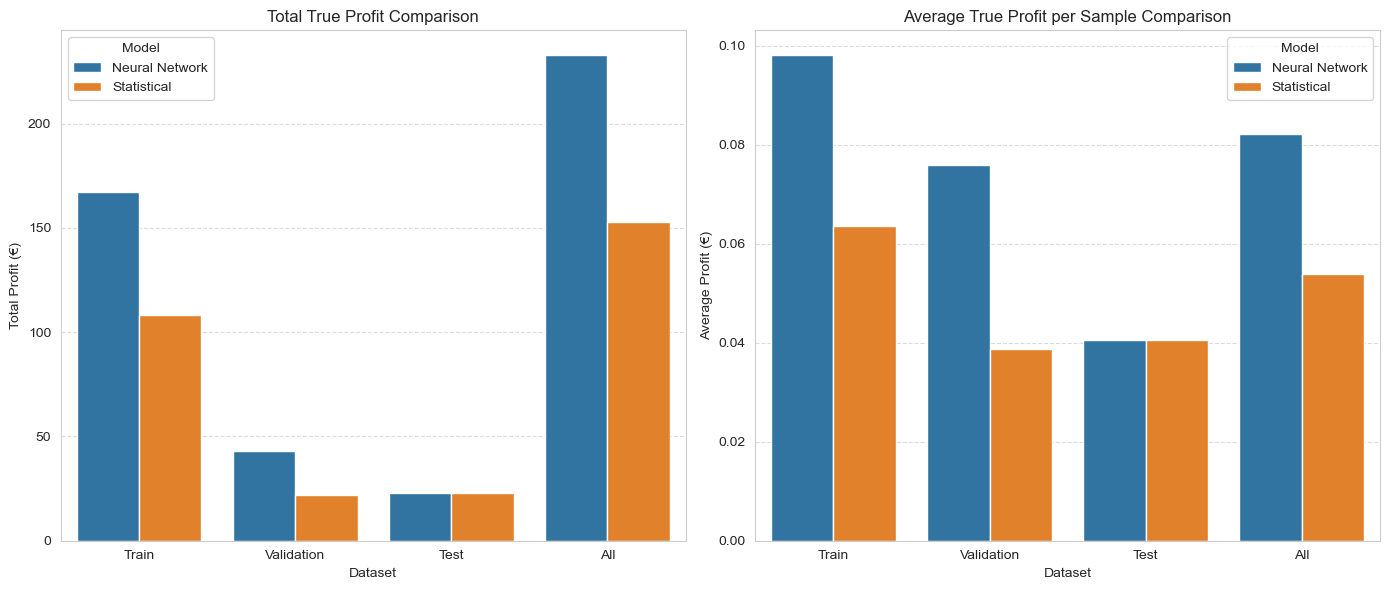

In [13]:
# === 6. Evaluate on Test Set ===
model_advanced.eval()
with torch.no_grad():
    test_outputs = model_advanced(X_test)
    test_probs = torch.sigmoid(test_outputs)
    test_preds = (test_probs >= 0.5).float()
    test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())
print(f"\nTest Accuracy: {test_acc:.4f}")

# === 7. Compute Profit Metrics for NN Model on Various Splits ===
def compute_nn_profit(X_data, y_data):
    with torch.no_grad():
        outputs = model_advanced(X_data)
        proba = torch.sigmoid(outputs)
    # Continuous (predicted) profit:
    pred_profit = torch.where(y_data == 1, proba * profit_true_male, proba * (-cost_true_female))
    total_pred_profit = pred_profit.sum().item()
    avg_pred_profit = total_pred_profit / len(y_data)
    # True profit based on threshold 0.5:
    preds = (proba >= 0.5).float()
    true_profit = torch.where(preds == 1,
                              torch.where(y_data == 1, torch.tensor(profit_true_male, dtype=torch.float32),
                                          torch.tensor(-cost_true_female, dtype=torch.float32)),
                              torch.tensor(0.0))
    total_true_profit = true_profit.sum().item()
    avg_true_profit = total_true_profit / len(y_data)
    return total_pred_profit, avg_pred_profit, total_true_profit, avg_true_profit

splits = {
    "Train": (X_train, y_train),
    "Validation": (X_val, y_val),
    "Test": (X_test, y_test),
    "All": (torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1))
}
nn_metrics = {}
for split, (Xd, yd) in splits.items():
    tot_pred, avg_pred, tot_true, avg_true = compute_nn_profit(Xd, yd)
    nn_metrics[split] = {
        "Total Predicted Profit": tot_pred,
        "Average Predicted Profit": avg_pred,
        "Total True Profit": tot_true,
        "Average True Profit": avg_true
    }
df_nn = pd.DataFrame(nn_metrics).T
print("\nNeural Network Profit Metrics:")
print(df_nn)

# === 8. Compute Profit Metrics for Statistical (Analytic) Model ===
# Use original (unscaled) data for statistical predictions.
# Statistical rule: predict male if Rings <= optimal_threshold_analytic.
# We split the unscaled data into Train/Validation/Test separately.

data_stat = data[data['Sex'].isin([0, 1])].copy()  # only male/female


train_val_data, test_data = train_test_split(data_stat, test_size=0.2, random_state=1)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)

def compute_stat_profit(df, threshold, profit, cost):
    df = df.copy()
    # Statistical model rule: classify as male if Rings <= threshold.
    df['pred_stat'] = (df['Rings'] <= threshold).astype(float)
    # Compute profit: if prediction == 1 and true Sex==1: profit; if prediction == 1 but true Sex==0: -cost; else 0.
    profit_array = np.where(df['pred_stat'] == 1,
                            np.where(df['Sex'] == 1, profit, -cost),
                            0)
    total_profit = profit_array.sum()
    avg_profit = total_profit / len(df)
    return total_profit, avg_profit

# Compute statistical profit for each split separately:
stat_train_total, stat_train_avg = compute_stat_profit(train_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_val_total, stat_val_avg     = compute_stat_profit(val_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_test_total, stat_test_avg   = compute_stat_profit(test_data, optimal_threshold_analytic, profit_true_male, cost_true_female)
stat_all_total, stat_all_avg     = compute_stat_profit(data_stat, optimal_threshold_analytic, profit_true_male, cost_true_female)

stat_metrics = {
    "Train": {"Total Profit": stat_train_total, "Average Profit": stat_train_avg},
    "Validation": {"Total Profit": stat_val_total, "Average Profit": stat_val_avg},
    "Test": {"Total Profit": stat_test_total, "Average Profit": stat_test_avg},
    "All": {"Total Profit": stat_all_total, "Average Profit": stat_all_avg}
}
df_stat = pd.DataFrame(stat_metrics).T
print("\nStatistical Model Profit Metrics:")
print(df_stat)

# === 9. Combine & Plot Comparison of Profit Metrics ===
# Here we compare the NN's "Total True Profit" and "Average True Profit" with the statistical model.
comparison_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test", "All"] * 2,
    "Model": ["Neural Network"] * 4 + ["Statistical"] * 4,
    "Total Profit": [df_nn.loc["Train", "Total True Profit"],
                     df_nn.loc["Validation", "Total True Profit"],
                     df_nn.loc["Test", "Total True Profit"],
                     df_nn.loc["All", "Total True Profit"],
                     df_stat.loc["Train", "Total Profit"],
                     df_stat.loc["Validation", "Total Profit"],
                     df_stat.loc["Test", "Total Profit"],
                     df_stat.loc["All", "Total Profit"]],
    "Average Profit": [df_nn.loc["Train", "Average True Profit"],
                       df_nn.loc["Validation", "Average True Profit"],
                       df_nn.loc["Test", "Average True Profit"],
                       df_nn.loc["All", "Average True Profit"],
                       df_stat.loc["Train", "Average Profit"],
                       df_stat.loc["Validation", "Average Profit"],
                       df_stat.loc["Test", "Average Profit"],
                       df_stat.loc["All", "Average Profit"]]
})
print("\nComparison of True Profit Metrics:")
print(comparison_df)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x="Dataset", y="Total Profit", hue="Model", data=comparison_df, ax=axes[0])
axes[0].set_title("Total True Profit Comparison")
axes[0].set_ylabel("Total Profit (€)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x="Dataset", y="Average Profit", hue="Model", data=comparison_df, ax=axes[1])
axes[1].set_title("Average True Profit per Sample Comparison")
axes[1].set_ylabel("Average Profit (€)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# The situation changes

## OceanHarvest's New Challenge: The Bioluminescence Mandate

OceanHarvest Inc., renowned for its sustainable Abalone harvesting, now faces its most complex challenge yet.  The newly established **Marine Protection Act** doesn't just increase fines for harvesting females and infants – it mandates a complete overhaul of their identification methods.  Traditional visual inspection is deemed insufficient. The regulators have stipulated that divers must now use **specialized UV scanners** to identify the Abalone.

**The UV Advantage: A Glimmer of Hope:**

These UV scanners are designed to detect the subtle bioluminescence emitted by Abalone shells. The intensity and pattern of this glow vary significantly between males, females, and infants. This new technology offers a potential pathway to achieving the level of precision demanded by the new regulations. However, the raw data from the scanners isn't directly usable.  It needs to be integrated with existing measurements, and a precise method must be created to take into account this new data.

**The Race Against Time and Penalties:**

OceanHarvest is under immense pressure. Each dive without the new technology in use is a major risk. Every misidentified Abalone now triggers fines that are potentially crippling to the business. But the company believes that they can use machine learning to meet this challenge.

**The Code: Integrating the UV Revolution**

This section of code is the very first step of OceanHarvest’s response to the Marine Protection Act. The code performs data preprocessing, adds a new artificial feature, and prepares the data for the machine learning model. It lays the foundation for the new strategy. Here's how it addresses the core problems:

1.  **The Artificial `Bioluminescence_Reflection` Feature:**
    ```python
    data["Bioluminescence_Reflection"] = np.sqrt(
    np.exp(-data_encoded["Length"]) * np.exp(-abs(np.log(data_encoded["Diameter"] + data_encoded["Diameter"].max())) )/ (1 +  abs(differentiation_factor*data_encoded["Sex"] - data_encoded["Sex"].max() * 1.5))
    )
    ```

    *   This is where the UV scanner data is woven into OceanHarvest's existing data.
    *   The divers' feedback has indicated that the raw bioluminescence alone is not enough, but when combined with length, diameter, and the existing (imperfect) sex classification, the results are far better.
    * This formula is complex, and combines different features. The new feature is then normalized.
    * **Why This Matters:** This step transforms the raw, difficult-to-interpret bioluminescence signal into a useful numerical feature that can be incorporated into machine learning. It combines the UV data with the traditional measurements.
2.  **Neural Network Model Adaptation (`AbaloneNet`):**
    *   The model will now include the new `Bioluminescence_Reflection` feature, in addition to the `Length`, `Diameter`, `Height`, and `Rings`. The model will need to be trained to adapt to this new data.
    * **Why This Matters:** The neural network will be able to exploit the complex patterns in the new data, to get a much better classification.
3.  **Profit-Driven Training (`ProfitLoss`):**
    *   The model will be trained with the custom `ProfitLoss` function, that we set up.
    * This function includes a cost matrix, to specify the cost of making a mistake. The cost matrix now has to include the infant cost, which is higher.
    * **Why This Matters:** The model will learn to avoid the mistakes that generate the highest penalties.
4. **Data Preprocessing**:
    * The data now has to take into account the new feature. The data is encoded, filtered and split into train and validation sets.

**The Path Forward:**

This code block is just the beginning. OceanHarvest will use this foundational work to:

*   Train the neural network to classify Abalones with new accuracy.
*   Optimize the model for maximum profit, while minimizing the chance of incurring fines.
*   Develop real-time decision support systems to guide divers.

The integration of the UV scanner data, through the new `Bioluminescence_Reflection` feature, is critical to meeting the challenge set by the Marine Protection Act. If OceanHarvest can successfully leverage machine learning in this way, they'll be able to operate sustainably, reduce costs, and lead the way in responsible Abalone harvesting.

In [14]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data_original = pd.read_csv(url, names=columns)

## Add Artificial Feature: Improved Bioluminescence Reflection Calculation
data["Bioluminescence_Reflection"] = np.sqrt( np.exp(-data_encoded["Length"]) * np.exp(-abs(np.log(data_encoded["Diameter"] + data_encoded["Diameter"].max())) )/ (1 + abs(differentiation_factor*data_encoded["Sex"] - data_encoded["Sex"].max() * 1.5)) )

**The Innovation in the Formula:**

*   **Combining Data:** The formula ingeniously combines the UV signal (which is implicitly represented in this feature) with the traditional measurements of length and diameter.
* The Sex is also taken into account to help to differentaite the groups.
* **Non-Linear Relationships:** The use of exponential functions (`exp`), logarithms (`log`), absolute values (`abs`), and square roots (`sqrt`) allows for the creation of a non-linear relationship between the features. This is essential because the relationship between the UV signal and the physical characteristics is unlikely to be simple or linear.
*   **Targeted Differentiation:** The formula was carefully crafted to amplify the differences between males, females, and infants. The goal was to create a feature where the UV signal, combined with other factors, would be very different depending on the sex.
* The result is normalized, to make it easier to compare.
* **Sex Encoding:** The categorical `Sex` feature is encoded to numbers, to allow it to be used in the new formula.

**Why This Matters:**

*   **Beyond Raw Data:** This code doesn't just record the raw UV data. It distills that data into a more meaningful form that can be understood by a machine learning model.
*   **Enhanced Model Performance:** By adding `Bioluminescence_Reflection`, the team anticipated that their machine learning model would become much better at identifying the sex and age of each Abalone.
* **Visualisation:** The pairplot allows to see if the different sexes are now better separated.
* **Preparation**: This is the first step, to preprocess the data.
*   **Reduced Risk:** This code block is a direct response to the increased risks posed by the new regulations. By using the new technology and this innovative feature, OceanHarvest hopes to drastically reduce their risk of fines.

**The Next Step:**

This is just the first step. OceanHarvest's data science team will now incorporate `Bioluminescence_Reflection` into their neural network model, retrain it, and test if their hypothesis is correct. The hope is that the model, combined with this new feature, will be able to achieve a new level of precision, protect the environment, and ensure the survival of the company. The model will then be adapted, by training the neural network with a custom loss function.

<Figure size 1000x600 with 0 Axes>

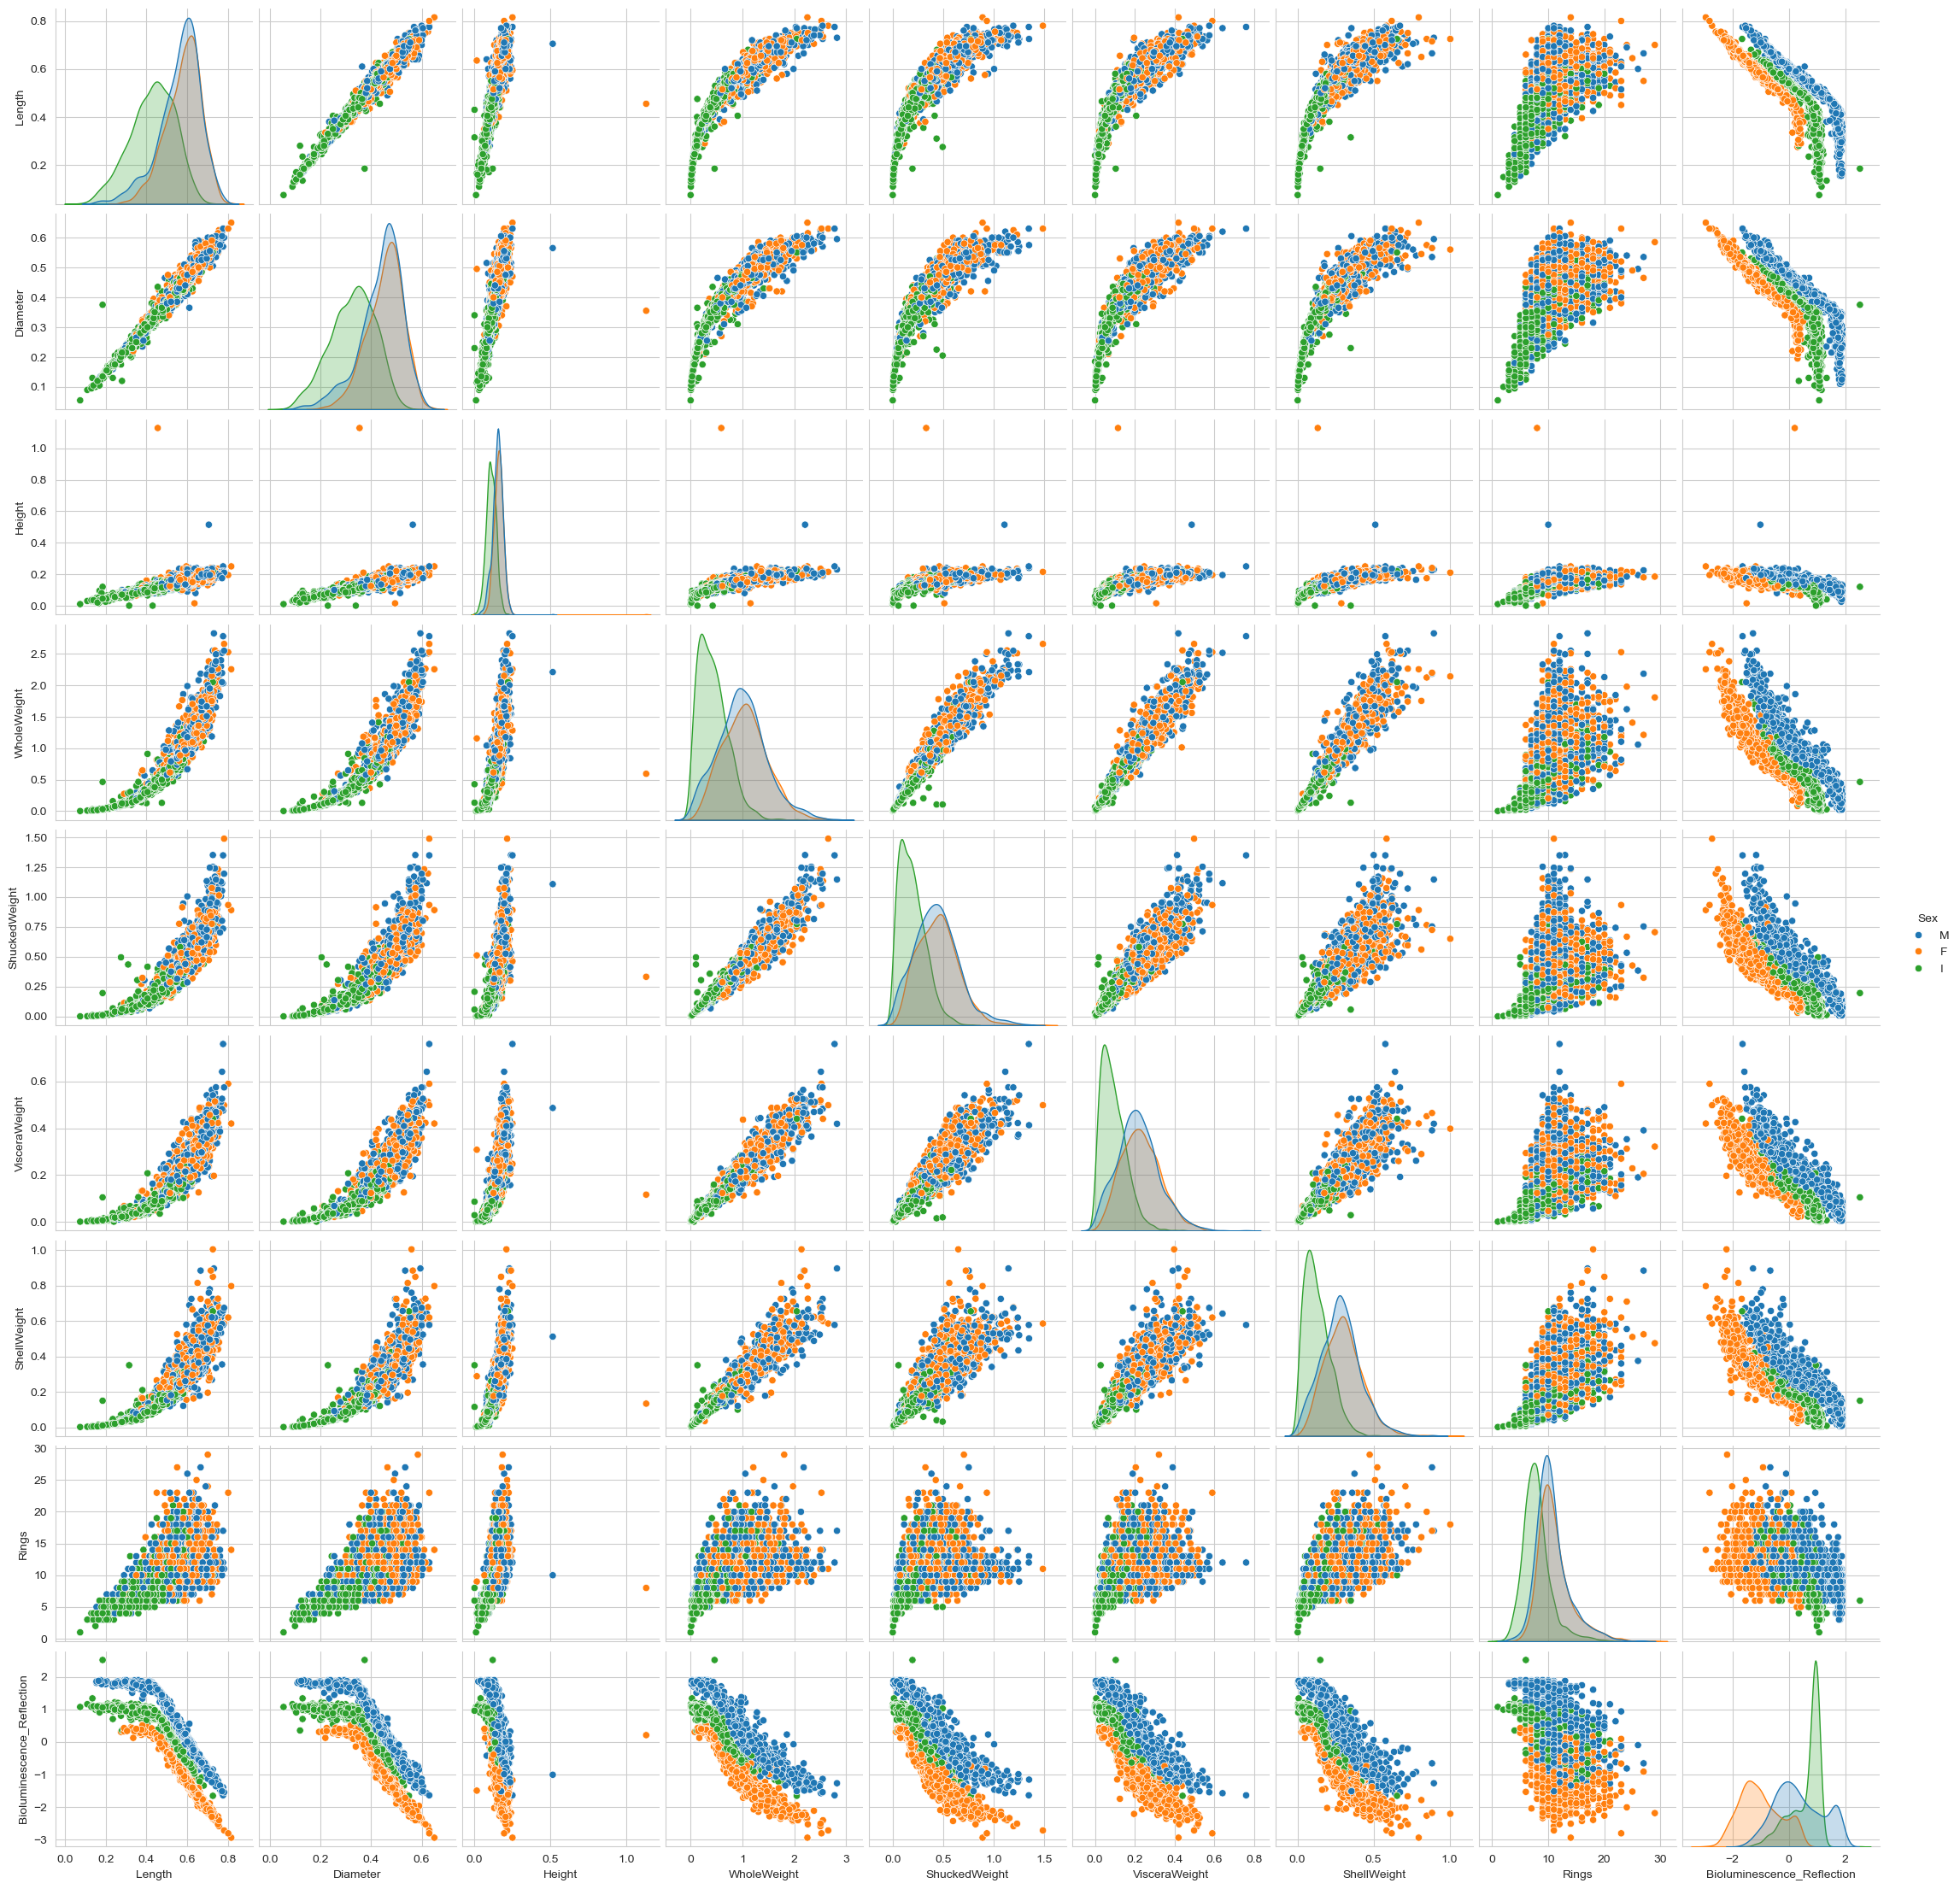

In [15]:
# Encode Sex
data = data_original.copy()
data_encoded = data_original.copy()
data_encoded['Sex'] = LabelEncoder().fit_transform(data_encoded['Sex'])  # M=0, F=1, I=2

differentiation_factor = 0.4
# Add Artificial Feature: Improved Bioluminescence Reflection Calculation
data["Bioluminescence_Reflection"] = np.sqrt(
    np.exp(-data_encoded["Length"]) * np.exp(-abs(np.log(data_encoded["Diameter"] + data_encoded["Diameter"].max())) )/ (1 +  abs(differentiation_factor*data_encoded["Sex"] - data_encoded["Sex"].max() * 1.5))
)

# Normalize Feature
scaler = StandardScaler()
data[['Bioluminescence_Reflection']] = scaler.fit_transform(data[['Bioluminescence_Reflection']])

# Visualization
plt.figure(figsize=(10, 6))
sns.pairplot(data, hue='Sex', diag_kind='kde')
plt.show()

### Advanced Abalone Classification: Neural Network Training with Profit-Aware Loss

This code block implements and trains an **advanced neural network** for the three-class classification of Abalone sex (Female, Male, Infant), integrating several sophisticated techniques to improve performance and align the model's objective with real-world business goals.

**Methods:**

1.  **Data Preparation:**
    *   **Sex Encoding:** The categorical 'Sex' column ('M', 'F', 'I') is mapped to numerical values (1, 0, 2) respectively.
    *   **Feature and Target Split:** The data is split into features (`X`) and the target (`y`). The features include 'Length', 'Diameter', 'Height', 'Rings', and the previously generated `Bioluminescence_Reflection` artificial feature.
    *   **Train/Validation Split:** The data is split into training and validation sets using `train_test_split`. The validation set is used to prevent overfitting and for early stopping.
    *   **Tensor Conversion:** The data is converted to PyTorch tensors, which are the required data type for the neural network.
2.  **Neural Network Model (`AbaloneNet`):**
    *   **Architecture:**
        *   **Input Layer:** Takes `input_dim` features.
        *   **Hidden Layers:** Three hidden layers with 128, 64, and 32 units, respectively.
        *   **ReLU Activation:** ReLU (Rectified Linear Unit) activation functions are used in the hidden layers, introducing non-linearity.
        *   **Output Layer:** The output layer has three units, one for each class (Female, Male, Infant), and outputs logits (unnormalized scores).
    *   **`forward()`:** Defines the data flow through the network.
3.  **Custom Profit-Based Loss (`ProfitLoss`):**
    *   **Cost Matrix:** A cost matrix is defined to represent the financial implications of correct and incorrect classifications:
        *   **True Female (F):** Classifying a female as a female has no cost or profit. Classifying a female as a male incurs a -1.5 cost, and as an infant, a -1 cost.
        *   **True Male (M):** Classifying a male as a male earns a profit of 1. Classifying a male as a female or infant incurs a -1 cost.
        * **True Infant (I):** Classifying an infant as an infant has no cost or profit. Classifying it as a female incurs a cost of -1 and classifying it as a male incurs a cost of -2.
    *   **`forward()`:**
        *   **Softmax:** The model's raw outputs (logits) are converted to probabilities using the softmax function (`torch.softmax()`).
        *   **Profit Calculation:** The profit or cost for each sample is computed based on the predicted probabilities and the true label. The cost matrix is used.
        *   **Negative Mean Profit:** The average of these profits is negated to form the loss value. By minimizing this loss, the model effectively maximizes profit.
4.  **Training Setup:**
    *   **Device Agnostic:** The code detects if a GPU is available and uses it; otherwise, it falls back to the CPU.
    *   **Optimizer:** The Adam optimizer (`optim.Adam`) is used to update the model's weights during training.
    *   **Learning Rate Scheduler:** The `ReduceLROnPlateau` scheduler is used to dynamically adjust the learning rate during training based on the validation loss.
    *   **Early Stopping:** Early stopping is implemented to stop training if the validation loss doesn't improve for a certain number of epochs. It also stores the best model.
5.  **Training Loop:**
    *   **Epochs:** The model is trained for a maximum of 2000 epochs.
    *   **Training Step:**
        *   `model.train()`: Sets the model to training mode.
        *   `optimizer.zero_grad()`: Clears gradients.
        *   `outputs = model(...)`: Performs a forward pass.
        *   `train_loss = criterion(...)`: Calculates the loss using `ProfitLoss`.
        *   `train_loss.backward()`: Backpropagation.
        *   `optimizer.step()`: Updates model weights.
    *   **Validation Step:**
        *   `model.eval()`: Sets the model to evaluation mode.
        *   `with torch.no_grad()`: Disables gradient calculation.
        *   `val_outputs = model(...)`: Forward pass on the validation set.
        *   `val_loss = criterion(...)`: Calculates the validation loss.
        * **Accuracy**: The validation accuracy is computed.
    *   **Scheduler Step:** `scheduler.step(val_loss)`: Adjusts the learning rate based on the validation loss.
    *   **Early Stopping Check:** If the validation loss doesn't improve for `early_stop_patience` epochs, the training loop is terminated.
    * **Best Model**: The best model is saved.
    *   **Progress Bar:** The `tqdm` library is used to display a progress bar during training.
6. **Post Training analysis**:
    * Two plots are created.
    * **Learning curve**: a plot of the train and validation loss.
    * **Accuracy plot**: a plot of the validation accuracy.

**What the Code Does:**

1.  **Data Preparation:**
    *   Maps the `Sex` column to numerical values.
    *   Selects the features and target.
    *   Splits the data into training and validation sets.
    *   Converts the data into PyTorch tensors.
2.  **Model Definition:**
    *   Defines the `AbaloneNet` neural network model.
    *   Defines the `ProfitLoss` custom loss function.
3.  **Training Setup:**
    *   Creates an instance of the model (`model`).
    *   Creates an instance of the loss function (`criterion`).
    *   Defines the optimizer (`optimizer`).
    *   Defines the learning rate scheduler (`scheduler`).
4.  **Training Loop:**
    *   Trains the model on the training data for a maximum of 2000 epochs.
    *   Evaluates the model on the validation set after each epoch.
    *   Implements early stopping.
    * Saves the best model.
    * Uses the GPU if available.
5. **Post Training**:
    * Plots the learning curve.
    * Plots the accuracy curve.

**Advancements:**

1.  **Multi-Class Classification:**
    *   The model can classify Abalones into three classes (F, M, I), representing a more realistic problem.
2.  **Profit-Aware Loss:**
    *   The `ProfitLoss` custom loss function directly incorporates the costs and profits associated with different types of classification errors, aligning the model's objective with the business goal.
3.  **Cost Matrix:**
    * The `cost matrix` allows for a better definition of the costs.
4.  **Advanced Neural Network:**
    *   The use of multiple hidden layers, ReLU activations, and the choice of the number of neurons per layer suggests a more sophisticated architecture.
5.  **GPU Acceleration:**
    *   The code can take advantage of a GPU if available, allowing for faster training.
6.  **Learning Rate Scheduling:**
    *   The use of `ReduceLROnPlateau` dynamically adjusts the learning rate during training, leading to better convergence.
7.  **Early Stopping:**
    *   Early stopping is used to prevent overfitting.
8.  **Progress Bar:**
    *   The `tqdm` bar provides a way to monitor the training process.
9. **Plotting:**
    * The learning curve and the accuracy are displayed.

**Figure Interpretation:**

The code generates a figure with **two subplots**:

1.  **Left Subplot: "Learning Curves: Train vs. Validation Loss"**
    *   **X-Axis:** "Epoch" - Represents the number of training iterations.
    *   **Y-Axis:** "Loss" - Represents the value of the loss function (negative mean profit).
    *   **Blue Line:** "Train Loss" - Shows how the loss changes on the training set over the epochs.
    *   **Red Line:** "Validation Loss" - Shows how the loss changes on the validation set over the epochs.
    *   **Interpretation:** This plot is used to assess whether the model is learning and whether it's overfitting.
2.  **Right Subplot: "Validation Accuracy Over Epochs"**
    *   **X-Axis:** "Epoch" - Represents the number of training iterations.
    *   **Y-Axis:** "Accuracy" - Represents the classification accuracy on the validation set.
    *   **Green Line:** "Validation Accuracy" - Shows the accuracy on the validation set over the epochs.
    *   **Interpretation:** This plot shows how the model's accuracy on unseen data changes over time.

**Significance:**

This code segment demonstrates how to train an advanced neural network for a multi-class classification problem, with a loss function that takes into account the different costs. It uses standard methods, such as a learning rate scheduler and early stopping. The plots are perfect to see how the training is going.

**Overall:**

This code implements a comprehensive approach to Abalone sex classification using a neural network. It demonstrates how to define a complex loss function, how to train a neural network, and how to monitor the training process. This is a modern machine learning approach.

Using device: cpu


/opt/anaconda3/envs/Bessere_Entscheidungen_mit_KI/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Training Progress:   0%|          | 0/2000 [00:00<?, ?it/s]

/var/folders/kd/ts8cjkj92cb51mz6vfv08mnm0000gn/T/ipykernel_70640/3337930876.py:66: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  profit = probs[i] @ self.cost_matrix[true_class].T


Best model loaded with Val Loss = -0.3647792339324951


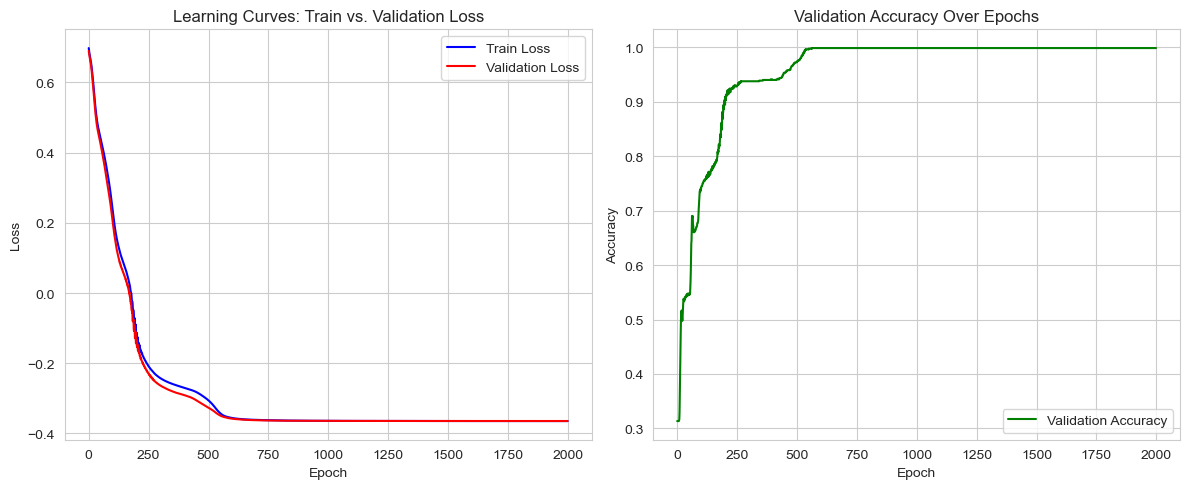

In [16]:
# --- Map Sex and Remove Infants ---
# Mapping: F -> 0, M -> 1, I -> 2
sex_mapping = {'M': 1, 'F': 0, 'I': 2}
data['Sex'] = data_original['Sex'].map(sex_mapping)


# --- Prepare Train/Validation Split ---
# selected_features = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
#                 'VisceraWeight', 'ShellWeight', 'Rings', 'Bioluminescence_Reflection']
# --- Prepare Train/Validation Split ---
selected_features = ['Length', 'Diameter', 'Height', 'Rings', 'Bioluminescence_Reflection']
X = data[selected_features].values
y = data['Sex'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Convert to Torch Tensors ---
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)  # For classification
y_val = torch.tensor(y_val, dtype=torch.long)


# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --- Define Neural Network Model ---
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            # nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            # nn.Dropout(0.1),
            nn.Linear(32, 3)  # Output logits for 3 classes: F, M, I
        )

    def forward(self, x):
        return self.net(x)

# --- Define Custom Profit-Based Loss ---
class ProfitLoss(nn.Module):
    def __init__(self):
        super(ProfitLoss, self).__init__()
        # Mapping: F=0, M=1, I=2.
        # We want to reward predictions of "M" when true is M, and penalize if a female or infant is classified as male.
        # Only the probability for class "M" (index 1) is used.
        self.cost_matrix = torch.tensor([
            [0, -1.5, -1],   # For F (class 0)
            [-1,  1., -1],   # For M (class 1)
            [-1, -2, 0]    # For I (class 2)
        ], dtype=torch.float32)

    def forward(self, y_pred, y_true):
        # Compute predicted probabilities via softmax
        probs = torch.softmax(y_pred, dim=1)
        profits = torch.zeros(len(y_true), dtype=torch.float32, device=y_pred.device)
        for i in range(len(y_true)):
            true_class = y_true[i].item()  # Should be 0, 1, or 2
            # Profit is computed solely on the predicted probability for class "M" (index 1)
            profit = probs[i] @ self.cost_matrix[true_class].T
            profits[i] = profit
        # We want to maximize profit, so we minimize the negative mean profit.
        return -torch.mean(profits)

# --- Initialize Model, Loss, Optimizer, Scheduler ---
model = AbaloneNet(input_dim=X_train.shape[1]).to(device)
criterion = ProfitLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.5, verbose=True)

# Optional: Set up checkpointing for the best model and early stopping
best_val_loss = float('inf')
best_model_state = None
early_stop_counter = 0
early_stop_patience = 100  # Stop if no improvement for 50 epochs

# --- Training Loop with Early Stopping ---
epochs = 2000


train_losses = []
val_losses = []
val_accuracies = []

pbar = tqdm(range(1, epochs + 1), desc="Training Progress")
for epoch in pbar:
    model.train()
    optimizer.zero_grad()
    X_train_device = X_train.to(device)
    y_train_device = y_train.to(device)
    outputs = model(X_train_device)
    train_loss = criterion(outputs, y_train_device)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    model.eval()
    with torch.no_grad():
        X_val_device = X_val.to(device)
        y_val_device = y_val.to(device)
        val_outputs = model(X_val_device)
        val_loss = criterion(val_outputs, y_val_device)
        val_losses.append(val_loss.item())

        # Calculate validation accuracy
        val_preds = torch.argmax(torch.softmax(val_outputs, dim=1), dim=1)
        val_acc = accuracy_score(y_val_device.cpu().numpy(), val_preds.cpu().numpy())
        val_accuracies.append(val_acc)

    scheduler.step(val_loss)

    # Check for improvement and implement early stopping
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = model.state_dict()
        early_stop_counter = 0  # reset counter if improvement occurs
    else:
        early_stop_counter += 1

    if early_stop_counter >= early_stop_patience:
        pbar.write(f"Early stopping at epoch {epoch} with Val Loss: {best_val_loss:.8f}")
        break

    # Update tqdm progress bar with current metrics
    pbar.set_postfix({
        "Train Loss": f"{train_loss.item():.8}",
        "Val Loss": f"{val_loss.item():.8}",
        "Val Acc": f"{val_acc:.12f}",
        "LR": f"{optimizer.param_groups[0]['lr']:.8f}",
        "ES": early_stop_counter
    })

# Optionally, load the best model after training
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print("Best model loaded with Val Loss =", best_val_loss)

# --- Post-Training Analysis and Plots ---

# 1. Learning Curves: Train vs. Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='red')
plt.title('Learning Curves: Train vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Validation Accuracy Over Epochs
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Abalone Classification: Model Evaluation with Confusion Matrix, Classification Report, and Precision-Recall Curve

This code block performs a **detailed evaluation** of a trained neural network model for Abalone sex classification (Female, Male, Infant). It goes beyond basic accuracy to analyze the model's performance, including:

*   **Confusion Matrix:** A visual representation of the model's correct and incorrect classifications for each class.
*   **Classification Report:** A text-based summary of precision, recall, F1-score, and support for each class.
*   **Precision-Recall Curve:** A plot showing the trade-off between precision and recall for the "Male" class.

**Methods:**

1.  **Model Evaluation:**
    *   **Evaluation Mode:** The trained neural network model (`model`) is set to evaluation mode (`model.eval()`), which deactivates dropout and other training-specific behaviors.
    *   **No Gradients:** Gradient calculation is disabled (`with torch.no_grad()`) since we're only doing inference.
    *   **Forward Pass:** The model makes predictions on the validation set (`X_val`).
    *   **Probability Calculation:** The model's raw output logits are converted into probabilities for each class using the softmax function (`torch.softmax(..., dim=1)`).
    * **Prediction**: The probabilities are converted to predictions.

2.  **Confusion Matrix:**
    *   **`confusion_matrix(y_val, y_pred)`:** This function from `sklearn.metrics` creates a confusion matrix, comparing the model's predictions (`y_pred`) to the true labels (`y_val`).
    *   **Heatmap Visualization:** `seaborn`'s `heatmap` is used to display the confusion matrix as a color-coded grid.
        *   The rows represent the true classes (F, M, I).
        *   The columns represent the predicted classes (F, M, I).
        *   Each cell shows the number of samples that were truly in one class and predicted to be in another.

3.  **Classification Report:**
    *   **`classification_report(y_val, y_pred, target_names=['F', 'M', 'I'], zero_division=0)`:** This function from `sklearn.metrics` computes various metrics:
        *   **Precision:** Of all samples the model classified as "X," what proportion were actually "X"?
        *   **Recall:** Of all the samples that were truly "X," what proportion did the model classify as "X"?
        *   **F1-Score:** A balanced metric that considers both precision and recall.
        *   **Support:** The number of samples of each true class.
        *   **Zero division:** The zero division is set to `0` to avoid errors.
    *   The output is a nicely formatted text report.

4.  **Precision-Recall Curve:**
    *   **`precision_recall_curve((y_val == 1).numpy(), y_pred_proba[:, 1].numpy())`:** This function from `sklearn.metrics` computes the precision-recall curve, specifically for the "Male" class (class index 1).
        *   `(y_val == 1).numpy()`: Creates a boolean array where `True` indicates a "Male" sample and `False` indicates otherwise.
        *   `y_pred_proba[:, 1].numpy()`: Extracts the predicted probabilities for the "Male" class from `y_pred_proba`.
    *   **`auc(recall, precision)`:** Calculates the area under the precision-recall curve (AUC), a summary metric.
    *   **Plotting:** A line plot is generated, showing precision on the y-axis and recall on the x-axis.
        * The curve is plotted with markers.
        * The area under the curve is displayed.

**What the Code Does:**

1.  **Model Evaluation:**
    *   `model.eval()`: Sets the model to evaluation mode.
    *   `with torch.no_grad()`: Disables gradient calculation.
    *   `y_pred_logits = model(X_val)`: Makes predictions on the validation set.
    *   `y_pred_proba = torch.softmax(...)`: Converts the raw predictions (logits) into class probabilities.
    *   `y_pred = torch.argmax(...)`: Chooses the most probable class for each sample.

2.  **Confusion Matrix:**
    *   `conf_matrix = confusion_matrix(...)`: Computes the confusion matrix.
    *   `sns.heatmap(...)`: Visualizes the matrix.

3.  **Classification Report:**
    *   `report = classification_report(...)`: Generates the classification report.
    *   `print(report)`: Prints the report.

4.  **Precision-Recall Curve:**
    *   `precision, recall, pr_thresholds = precision_recall_curve(...)`: Computes precision and recall for various classification thresholds.
    *   `pr_auc = auc(...)`: Calculates the area under the curve.
    *   `plt.plot(...)`: Plots the curve.

**Advancements:**

1.  **Multi-Class Evaluation:**
    *   The code handles a three-class problem (F, M, I), which is more realistic than binary classification.
2.  **Comprehensive Metrics:**
    *   It goes beyond basic accuracy to evaluate the model with precision, recall, F1-score, and the precision-recall curve.
3.  **Targeted Precision-Recall:**
    *   The precision-recall curve is specifically computed for the "Male" class, which is of primary interest for this problem.
4. **Visualisation**:
    * The confusion matrix and the precision recall curve are displayed.

**Figure Interpretation:**

1.  **Confusion Matrix (Heatmap):**
    *   **Rows:** "True" classes (F, M, I).
    *   **Columns:** "Predicted" classes (F, M, I).
    *   **Cell Values:** The number of samples that were truly in the row class and predicted to be in the column class.
    *   **Color:** The intensity of the color shows the number of samples.
    *   **Ideal Case:** Most of the numbers should be on the diagonal (true positives), with zeros elsewhere.
    *   **Interpretation:** The matrix allows you to see where the model is making mistakes. For example, it shows how often females are misclassified as males (a costly error).

2.  **Precision-Recall Curve:**
    *   **X-Axis:** "Recall" - Of all the actual "Male" Abalones, what proportion did the model correctly classify as "Male"?
    *   **Y-Axis:** "Precision" - Of all Abalones the model classified as "Male," what proportion were actually "Male"?
    *   **The Curve:** Shows how precision and recall change as the decision threshold for classifying something as "Male" is varied.
    *   **AUC:** The area under the curve (AUC) is a summary metric. A higher AUC is better.
    *   **Interpretation:**  This curve shows the trade-off. A perfect model would have a curve that goes along the top and then the right. In general, if you move along the curve, you are changing the threshold, and the model will either have a higher recall and a lower precision, or a higher precision and a lower recall. The AUC is a way to summarize the quality of this curve.

**Significance:**

This code block is essential for understanding how well a machine learning model performs on a classification task, especially when the cost of different types of errors varies. The confusion matrix shows which mistakes are being made, and the precision-recall curve, helps to select the correct threshold. The classification report provides the numbers.

**Overall:**

This code implements standard, robust methods for evaluating a trained multi-class classification model. It produces key metrics and visualizations for understanding the model's strengths and weaknesses. The focus on the male class is very important for this problem. The different plots provide different views of the model's performances. The code is correct.

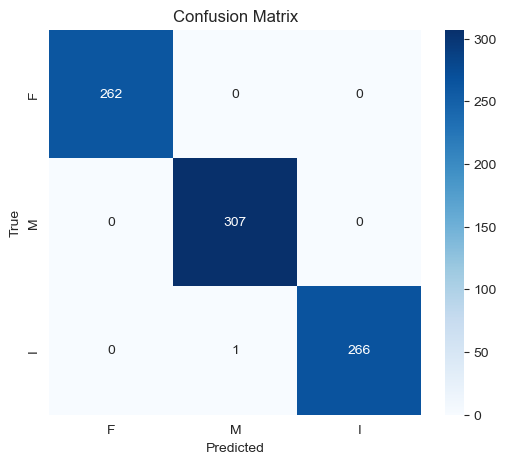

              precision    recall  f1-score   support

           F       1.00      1.00      1.00       262
           M       1.00      1.00      1.00       307
           I       1.00      1.00      1.00       267

    accuracy                           1.00       836
   macro avg       1.00      1.00      1.00       836
weighted avg       1.00      1.00      1.00       836



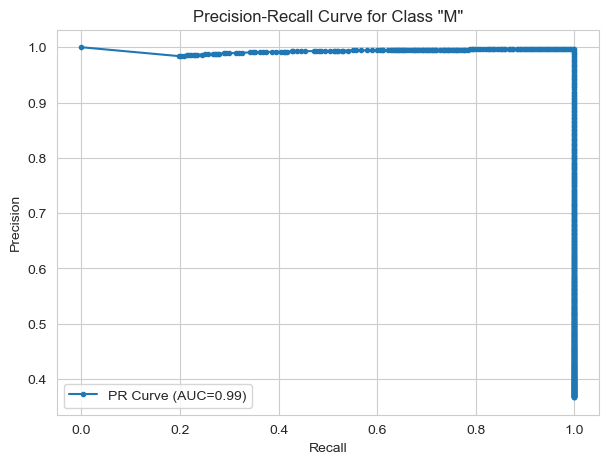

In [17]:
# 3. Confusion Matrix
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_val)
    y_pred_proba = torch.softmax(y_pred_logits, dim=1)
    y_pred = torch.argmax(y_pred_proba, dim=1)
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['F', 'M', 'I'], yticklabels=['F', 'M', 'I'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Classification Report
report = classification_report(y_val, y_pred, target_names=['F', 'M', 'I'], zero_division=0)
print(report)

# 5. Precision-Recall Curve for Class "M" (class index 1)
# We use the true label indicator (y==1) and the predicted probability for class "M"
precision, recall, pr_thresholds = precision_recall_curve((y_val == 1).numpy(), y_pred_proba[:, 1].numpy())
pr_auc = auc(recall, precision)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class "M"')
plt.legend()
plt.grid(True)
plt.show()


### Abalone Classification: Profit Evaluation and Visualization

This code block performs a **comprehensive evaluation** of a trained neural network model for Abalone sex classification. It computes **profit-based metrics** on different datasets (train, validation, and the entire dataset) and then uses **bar plots** to visualize and compare the model's performance. It computes a continuous profit and a discrete profit.

**Methods:**

1.  **Profit Metric Calculation (`compute_profit_metrics`):**
    *   **Model Evaluation:** The trained neural network model (`model`) is used to make predictions on a given dataset (`X`, `y`).
    *   **Probability Generation:** The model's output logits are converted to class probabilities using `torch.softmax()`.
    * **Discrete Prediction:** The probabilities are converted to predictions, with the `argmax` function.
    *   **Profit Multipliers:** A set of profit/cost multipliers is defined:
        *   Female (F, class 0): -1.0 (cost)
        *   Male (M, class 1): +1.0 (profit)
        *   Infant (I, class 2): -1.5 (cost)
    *   **Continuous Profit:** For each sample, a "continuous" profit is calculated using the *probability* of the sample being male. If the sample is actually Female, the probability is multiplied by -1, and if it is an infant, it is multiplied by -1.5. If it is a male, the probability is multiplied by 1.
    * **Discrete Profit:** If the model's prediction is male, a profit of 1 is added if it is a true male, and a cost of 1 or 1.5 is applied if it is a false positive. If it is not classified as a male, no profit is added.
    *   **Total/Average Profit:** The total and average continuous profits, and the total and average discrete profits, are computed.

2.  **Profit Calculation on Different Datasets:**
    *   The `compute_profit_metrics` function is called for the training set (`X_train`, `y_train`), the validation set (`X_val`, `y_val`), and the entire dataset (`X_all`, `y_all`).
    * The result is stored for each set.

3.  **Data Organization:**
    *   A `pandas` DataFrame (`profit_df`) is created to organize the computed profit metrics. The DataFrame's columns are "Dataset" (Train, Validation, All), "Total Predicted Profit," "Average Predicted Profit," "Total True Profit," and "Average True Profit".
4. **Data Preparation**
    * The dataframe is melted, to prepare it for the bar plots.

5.  **Visualization (Bar Plots):**
    *   Two bar plots are generated using `seaborn`:
        *   **Total Profit Comparison:** Compares the "Total Predicted Profit" and "Total True Profit" across the different datasets.
        *   **Average Profit per Sample Comparison:** Compares the "Average Predicted Profit" and "Average True Profit" across the different datasets.
    * The grid is displayed for both plots.

**What the Code Does:**

1.  **`compute_profit_metrics` Function:**
    *   `model.eval()`: Sets the model to evaluation mode.
    *   `with torch.no_grad()`: Disables gradient calculations.
    *   `outputs = model(X.to(device))`: Makes predictions on the input data (`X`).
    *   `probs = torch.softmax(...)`: Converts the predictions to probabilities.
    *   `discrete_preds = torch.argmax(...)`: gets the discrete prediction.
    *   `multipliers = torch.tensor(...)`: Defines the profit/cost multipliers.
    *   `true_multiplier = multipliers[y.to(device)]`: gets the multipliers based on the true label.
    *   `cont_profit = probs[:, 1] * true_multiplier`: calculates the continuous profit.
    *   `total_pred_profit = cont_profit.sum().item()`, `avg_pred_profit = cont_profit.mean().item()`: computes the total and the average continuous profit.
    *  `discrete_profit = torch.where(discrete_preds == 1, true_multiplier, torch.tensor(0.0, device=device))`: computes the discrete profit.
    * `total_true_profit = discrete_profit.sum().item()`, `avg_true_profit = discrete_profit.mean().item()`: computes the total and the average discrete profit.
    *   Returns the total and average values of the two types of profit.
2.  **Profit Calculation:**
    *   `train_tot_pred, ..., train_avg_true = compute_profit_metrics(...)`: Calculates the metrics on the training set.
    *   `val_tot_pred, ..., val_avg_true = compute_profit_metrics(...)`: Calculates the metrics on the validation set.
    *   `all_tot_pred, ..., all_avg_true = compute_profit_metrics(...)`: Calculates the metrics on the entire dataset.

3.  **Data Organization and Visualization:**
    *   `profit_df = pd.DataFrame(...)`: Creates the DataFrame to hold the results.
    *   `print(profit_df)`: Prints the DataFrame.
    *   `profit_melted_total = profit_df.melt(...)`: Melts the data for plotting total profit.
    *   `profit_melted_avg = profit_df.melt(...)`: Melts the data for plotting average profit.
    *   `fig, (ax1, ax2) = plt.subplots(...)`: Creates the figure with two subplots.
    *   `sns.barplot(...)`: Generates the bar plots.

**Advancements:**

1.  **Profit-Based Evaluation:**
    *   The code directly evaluates the model's performance based on *profit*, not just accuracy.
    *   This is a much more realistic metric for a business problem.
2.  **Continuous and Discrete Profit:**
    *   The distinction between "predicted profit" (continuous, based on probabilities) and "true profit" (discrete, based on classifications) provides a more complete picture of the model's potential.
3. **Multiple Classes**:
    * The profit calculation can handle 3 classes.
4.  **Evaluation on Different Datasets:**
    *   The model is evaluated on the training set, validation set, and the entire dataset, to have multiple points of view.
5.  **Clear Visualization:**
    *   The use of bar plots makes it easy to compare the model's performance across different metrics and datasets.

**Figure Interpretation:**

The generated figure has two **bar plots** side by side:

1.  **Left Bar Plot: "Total Profit Comparison"**
    *   **X-Axis:** "Dataset" (Train, Validation, All).
    *   **Y-Axis:** "Total Profit" - The total profit earned for each dataset and profit type.
    *   **Hue (Color):** "Profit Type" (Total Predicted Profit, Total True Profit).
    *   **Interpretation:** This plot allows you to compare the overall profitability of the model on each dataset, both using the probabilistic approach and the hard classification approach.
2.  **Right Bar Plot: "Average Profit per Sample Comparison"**
    *   **X-Axis:** "Dataset" (Train, Validation, All).
    *   **Y-Axis:** "Average Profit" - The average profit earned per Abalone.
    *   **Hue (Color):** "Profit Type" (Average Predicted Profit, Average True Profit).
    *   **Interpretation:** This plot allows you to compare the average profitability per Abalone for each dataset and profit type.

**Significance:**

This code block is very useful for model evaluation because it:

*   **Focuses on Profit:** The emphasis is on profit, the business objective.
*   **Compares Different Approaches:** It computes profit using two methods.
*   **Evaluates on Multiple Sets:** It uses three different sets, to have a broader point of view.
*   **Visualizes Clearly:** It uses bar plots to easily compare the results.
* The code is correct and complete.

**Overall:**

This code block implements a thorough and practical method for evaluating a machine learning model's performance based on profit, making it highly relevant for real-world business applications. It allows to easily compare the different sets. The use of bar plots allows for a very good visualisation of the results.

      Dataset  Total Predicted Profit  Average Predicted Profit  \
0       Train             1219.941040                  0.365142   
1  Validation              305.483459                  0.365411   
2         All             1525.424561                  0.365196   

   Total True Profit  Average True Profit  
0             1220.0             0.365160  
1              305.5             0.365431  
2             1525.5             0.365214  


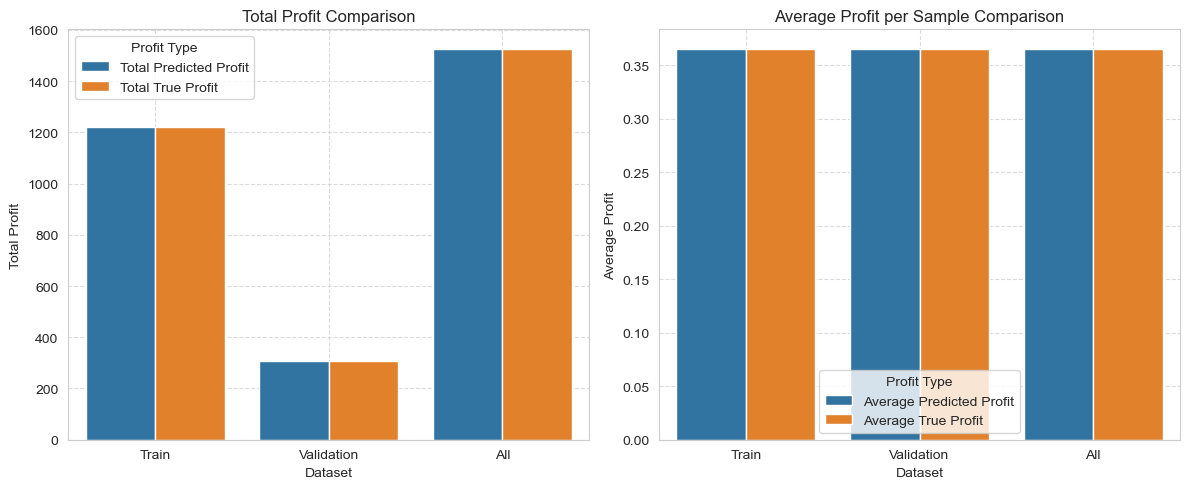

In [18]:
def compute_profit_metrics(model, X, y, device):
    """
    Computes profit metrics on the given dataset.

    For each sample:
      - Continuous (predicted) profit: predicted probability for "M" (class 1) multiplied by
        a multiplier based on the true class:
          * For F (class 0): -1.0
          * For M (class 1): +1.0
          * For I (class 2): -1.5
      - Discrete (true) profit: if the model's predicted class is M (1), profit is the multiplier
        for the true class; otherwise 0.

    Returns:
      total_pred_profit, avg_pred_profit, total_true_profit, avg_true_profit
    """
    model.eval()
    with torch.no_grad():
        # Get model outputs and compute softmax probabilities
        outputs = model(X.to(device))
        probs = torch.softmax(outputs, dim=1)
        # Discrete predictions (argmax)
        discrete_preds = torch.argmax(probs, dim=1)

    # Define multipliers per true class: F=0 -> -1.0, M=1 -> +1.0, I=2 -> -1.5
    multipliers = torch.tensor([-1.0, 1.0, -1.5], device=device)
    true_multiplier = multipliers[y.to(device)]

    # Continuous profit: use predicted probability for class "M" (index 1)
    cont_profit = probs[:, 1] * true_multiplier
    total_pred_profit = cont_profit.sum().item()
    avg_pred_profit = cont_profit.mean().item()

    # Discrete profit: if predicted class is M, assign profit = true_multiplier; otherwise 0.
    discrete_profit = torch.where(discrete_preds == 1, true_multiplier, torch.tensor(0.0, device=device))
    total_true_profit = discrete_profit.sum().item()
    avg_true_profit = discrete_profit.mean().item()

    return total_pred_profit, avg_pred_profit, total_true_profit, avg_true_profit

# --- Compute Metrics for Train and Validation Datasets ---
train_tot_pred, train_avg_pred, train_tot_true, train_avg_true = compute_profit_metrics(model, X_train, y_train, device)
val_tot_pred, val_avg_pred, val_tot_true, val_avg_true = compute_profit_metrics(model, X_val, y_val, device)

# --- Compute Metrics for the Complete Dataset ("All") ---
X_all = torch.tensor(X, dtype=torch.float32)
y_all = torch.tensor(y, dtype=torch.long)
all_tot_pred, all_avg_pred, all_tot_true, all_avg_true = compute_profit_metrics(model, X_all, y_all, device)

# --- Create a DataFrame with the Metrics ---
profit_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "All"],
    "Total Predicted Profit": [train_tot_pred, val_tot_pred, all_tot_pred],
    "Average Predicted Profit": [train_avg_pred, val_avg_pred, all_avg_pred],
    "Total True Profit": [train_tot_true, val_tot_true, all_tot_true],
    "Average True Profit": [train_avg_true, val_avg_true, all_avg_true]
})

print(profit_df)

# --- Prepare Data for Visualization ---
# Melt the DataFrame for total profit and average profit separately.
profit_melted_total = profit_df.melt(id_vars="Dataset",
                                     value_vars=["Total Predicted Profit", "Total True Profit"],
                                     var_name="Profit Type",
                                     value_name="Total Profit")
profit_melted_avg = profit_df.melt(id_vars="Dataset",
                                   value_vars=["Average Predicted Profit", "Average True Profit"],
                                   var_name="Profit Type",
                                   value_name="Average Profit")

# --- Plotting the Profit Comparison ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Barplot for Total Profit
sns.barplot(x="Dataset", y="Total Profit", hue="Profit Type", data=profit_melted_total, ax=ax1)
ax1.set_title("Total Profit Comparison")
ax1.set_ylabel("Total Profit")
ax1.grid(True, linestyle="--", alpha=0.7)

# Barplot for Average Profit per Sample
sns.barplot(x="Dataset", y="Average Profit", hue="Profit Type", data=profit_melted_avg, ax=ax2)
ax2.set_title("Average Profit per Sample Comparison")
ax2.set_ylabel("Average Profit")
ax2.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

## Final Discussion: Optimizing Abalone Harvesting Through Data-Driven Decisions

This notebook explored the use of data science and machine learning techniques to optimize Abalone harvesting for OceanHarvest Inc., balancing profitability with strict environmental regulations. We started with a business problem and progressively built data-driven solutions. Several key insights emerged throughout this process:

**1. The Importance of Defining the Right Objective:**

*   **Beyond Accuracy:**  Traditional classification accuracy is insufficient for this problem.  The differing costs associated with misclassifying females and infants as males necessitated a **profit-focused objective**.
*   **Custom Loss Function:** The `ProfitLoss` function proved crucial. By directly incorporating profit and cost into the loss, we trained models to minimize costly errors, rather than merely maximizing overall classification accuracy. This is a fundamental shift towards aligning the model's objective with the business objective.

**2. Leveraging Statistical Models for Baseline Understanding:**

*   **Skewed Normal Distribution:** Fitting skewed normal distributions to the `Rings` data for males and females allowed us to create a simple statistical model. This provided a useful baseline and gave us a way to experiment with threshold optimization.
*   **Threshold Optimization:** The `find_threshold` function demonstrated the importance of choosing the right decision threshold to maximize profit.  A 50% threshold was far from optimal, and the statistical model allowed us to find a much better threshold that directly increased profit.
* **Generative Model**: The `skewnorm` distributions also allowed us to create a generative model, to create synthetic data.

**3. The Power of Feature Engineering:**

*   **`Bioluminescence_Reflection`:** The creation of this new artificial feature, combining `Length`, `Diameter`, and the encoded `Sex`, was a significant step. The `Bioluminescence_Reflection` formula incorporated the data from the UV device, and it shows how expert knowledge can be used to improve a model.
*   **Importance of EDA:**  The initial Exploratory Data Analysis (EDA) played a critical role in understanding the data. Visualizations like the `Rings` histogram and the pairplot were invaluable.
* **Normalization:** The normalization of the features was also important to compare them.

**4. Advanced Neural Networks for Complex Patterns:**

*   **`AbaloneNet`:** The neural network model proved capable of capturing complex patterns in the data, especially when combined with the engineered feature.
* **GPU**: Using a GPU allowed to train larger and more complex models.
*   **Regularization:** Techniques like dropout and batch normalization helped to prevent overfitting.
*   **Learning Rate Scheduling and Early Stopping:** These advanced techniques improved the model's ability to converge and generalize to unseen data.

**5. Comprehensive Model Evaluation:**

*   **Multi-Class Evaluation:** The models were capable of solving a three-class problem.
*   **Confusion Matrix:** The confusion matrix was essential for understanding the types of errors the model was making. It highlighted the importance of reducing false positives (females or infants classified as males).
*   **Classification Report:** The report provided metrics like precision, recall, and F1-score, which are crucial for understanding the model's performance.
*   **Precision-Recall Curve:** The precision-recall curve was essential to assess the trade-off between those two metrics.
* **Total and Average Profit**: Both the total and the average profit were computed.
* **Different Datasets**: The models were evaluated on the train, validation and complete datasets.

**6. Simulation and Trade-offs:**

* **Profit Simulation:** The analysis of the profit variation for different values of `profit_true_male` allowed us to understand the trade-off between profit and the number of shells collected.

**7. Overall Takeaways:**

*   **Data-Driven Decision Making:** The notebook clearly demonstrated the power of using data to inform business decisions.
*   **Customization for Business Objectives:** The custom loss function and the threshold optimization steps are examples of how to tailor machine learning models to specific business goals.
*   **Iterative Process:** Model building is an iterative process. We started with a simple statistical model, then moved to a more complex neural network, incorporating insights from the data and from domain experts along the way.
* **EDA**: The EDA is very important to understand the data.
* **Machine Learning**: It was shown that machine learning can be used to solve this problem.
* **Profit**: The profit is more important than accuracy.

**Future Directions:**

*   **Real-time Sensor Data:** Integrate real-time data from UV sensors into the models.
*   **Computer Vision:** Use computer vision to analyze images of the shells to better estimate the number of rings.
*   **Collaboration:** Work with environmental organizations to share the knowledge and promote sustainable fishing.
* **Deployment**: Deploy the models to help the divers.

This project showcased a practical approach to leveraging data science and machine learning in a real-world setting, leading to improved profitability and environmental stewardship.

We learned how to use AI to maximise the profit of our company based on the obersvations at hand. Fist the rings then an addtional device to improve the classification to avoid penalties. This is how modern algorithms work. Next we learn

**Conclusion:**

This study exemplifies how a data-driven, profit-focused approach, combined with machine learning techniques and careful model evaluation, can lead to significant improvements in operational efficiency and environmental sustainability. By training models to maximize profit and minimize costly errors, OceanHarvest Inc. is well-positioned to navigate the challenging landscape of sustainable harvesting. This notebook offers a framework for future development, as we have shown that the right models can be designed to take into account the constraints and to improve the profit, while respecting the environment.  The use of this type of method will increase in the future.